<a href="https://colab.research.google.com/github/hsantos1985/core_projects/blob/main/MODELO_SERIES_TEMPORAIS_CHUVAS_MENSAIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####O OBJETIVO DESTE PROJETO É CRIAR UM MODELO DE TIME SERIES BASEADOS NOS DADOS PLUVIOMÉTRICOS MENSAIS DA CIDADE DE SÃO PAULO.  ENTRE 1985 E 2023.COM ISSO, REALIZAR O COMPARATIVO ENTRE ESTES MODELOS


---Os dados podem ser encontrados conforme abaixo:
https://hidrologia.spaguas.sp.gov.br/

PREFIXO: 	E3-262

NOME DO POSTO: 	GUARAU

MUNICÍPIO: 	SAO PAULO

CURSO D'ÁGUA: 	CABUCU DE BAIXO,R/(ITAGUACU,COR)

LATITUDE: 	23°26'33"

LONGITUDE: 	46°39'01"

Obs: valores com --- representam dados inexistentes.

Chuva Mensal (mm)

--SERÃO USADOS COMO DADOS DE TREINO, AS CHUVAS MENSAIS DE 1985 A 2020
--A BASE OOT (OUT OF THE TIME) SERÁ FORMADA PELOS DADOS DE CHUVAS DE 2021, 22 E 23

####1-BIBLIOTECAS

In [84]:
install.packages("dplyr")
install.packages('forecast')
install.packages("tidyr")
install.packages("MLmetrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’




In [88]:
library(forecast)
library(dplyr)
library(tidyr)
library(urca)
library(MLmetrics)


In [ ]:
#configuração dos gráficos
options(repr.plot.width = 19, repr.plot.height = 10)

####2-OBTENÇÃO DOS DADOS

In [ ]:
#OBTENDO OS DADOS
chuva_mensal<-
  read.csv2('/content/chuva_mensal_atualizada.csv', sep = ";", encoding = 'UTF-8')

In [ ]:
#VERIFICANDO A QUANTIDADE DE LINHAS E COLUNAS DO DATASET
dim(chuva_mensal)

[1] 40 13

In [ ]:
View(chuva_mensal)

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1985,"184,9","242,9",230,59.00,126.20,"14,6",4.00,"21,8","126,1","71,1","111,3","155,2"
1986,"199,6",221,"218,7",106.50,113.10,"3,9",30.30,---,"34,5","60,7","242,5","389,9"
1987,"525,8",---,"161,3",98.10,293.80,"183,9",11.80,"30,9","80,2","84,8","72,7","152,1"
1988,"268,7","224,4","189,2",175.10,224.90,"58,6",1.30,"0,2","28,4","173,9","100,2","289,8"
1989,"312,9","344,3","288,2",66.30,21.70,"52,5",150.10,"32,9","52,1","80,1",88,"236,7"
1990,"284,1","196,9","310,1",85.80,77.90,"50,6",121.20,"76,3","97,2","206,8","116,3","149,8"
1991,"330,7","340,3","522,4",200.30,43.30,"96,8",28.20,"37,3","101,4",168,"67,3","237,9"
1992,"129,2","258,5",---,87.20,93.50,"11,6",40.90,"24,7","150,6","219,6",---,"211,7"
1993,"221,5","225,7",110,84.60,133.90,"74,7",11.20,"40,8","210,1","134,1","125,5","170,5"


In [ ]:
#verificando o tipo dos dados
str(chuva_mensal)

'data.frame':	40 obs. of  13 variables:
 $ Ano      : chr  "1985" "1986" "1987" "1988" ...
 $ Janeiro  : chr  "184,9" "199,6" "525,8" "268,7" ...
 $ Fevereiro: chr  "242,9" "221" "---" "224,4" ...
 $ Março    : chr  "230" "218,7" "161,3" "189,2" ...
 $ Abril    : num  59 106.5 98.1 175.1 66.3 ...
 $ Maio     : num  126.2 113.1 293.8 224.9 21.7 ...
 $ Junho    : chr  "14,6" "3,9" "183,9" "58,6" ...
 $ Julho    : num  4 30.3 11.8 1.3 150.1 ...
 $ Agosto   : chr  "21,8" "---" "30,9" "0,2" ...
 $ Setembro : chr  "126,1" "34,5" "80,2" "28,4" ...
 $ Outubro  : chr  "71,1" "60,7" "84,8" "173,9" ...
 $ Novembro : chr  "111,3" "242,5" "72,7" "100,2" ...
 $ Dezembro : chr  "155,2" "389,9" "152,1" "289,8" ...


#####2.2-TRATAMENTO DOS DADOS

In [ ]:
#RETIRANDO AS 2 ÚLTIMAS LINHAS - 2023,2022,2021 e MÉDIA
chuva_mensal_int<-
chuva_mensal %>%
  filter(Ano!='2023') %>%
  filter(Ano!='2022') %>%
filter(Ano!='2021')%>%
  filter(Ano!='  Média:')

In [89]:
chuva_mensal_int

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1985,"184,9","242,9",230,59.0,126.2,"14,6",4.0,"21,8","126,1","71,1","111,3","155,2"
1986,"199,6",221,"218,7",106.5,113.1,"3,9",30.3,---,"34,5","60,7","242,5","389,9"
1987,"525,8",---,"161,3",98.1,293.8,"183,9",11.8,"30,9","80,2","84,8","72,7","152,1"
1988,"268,7","224,4","189,2",175.1,224.9,"58,6",1.3,"0,2","28,4","173,9","100,2","289,8"
1989,"312,9","344,3","288,2",66.3,21.7,"52,5",150.1,"32,9","52,1","80,1",88,"236,7"
1990,"284,1","196,9","310,1",85.8,77.9,"50,6",121.2,"76,3","97,2","206,8","116,3","149,8"
1991,"330,7","340,3","522,4",200.3,43.3,"96,8",28.2,"37,3","101,4",168,"67,3","237,9"
1992,"129,2","258,5",---,87.2,93.5,"11,6",40.9,"24,7","150,6","219,6",---,"211,7"
1993,"221,5","225,7",110,84.6,133.9,"74,7",11.2,"40,8","210,1","134,1","125,5","170,5"


In [90]:
#TRANSFORANDO AS COLUNAS EM NUMÉRICAS
#substituindo as virgulas por pontos
chuva_mensal_int2<-
chuva_mensal_int %>%
  mutate(across(where(is.character),~ as.numeric(gsub(",",".",.))))

Warning message:
“There were 8 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(where(is.character), ~as.numeric(gsub(",", ".", .)))`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 7 remaining warnings.”


In [91]:
chuva_mensal_int2

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1985,184.9,242.9,230.0,59.0,126.2,14.6,4.0,21.8,126.1,71.1,111.3,155.2
1986,199.6,221.0,218.7,106.5,113.1,3.9,30.3,NA,34.5,60.7,242.5,389.9
1987,525.8,NA,161.3,98.1,293.8,183.9,11.8,30.9,80.2,84.8,72.7,152.1
1988,268.7,224.4,189.2,175.1,224.9,58.6,1.3,0.2,28.4,173.9,100.2,289.8
1989,312.9,344.3,288.2,66.3,21.7,52.5,150.1,32.9,52.1,80.1,88.0,236.7
1990,284.1,196.9,310.1,85.8,77.9,50.6,121.2,76.3,97.2,206.8,116.3,149.8
1991,330.7,340.3,522.4,200.3,43.3,96.8,28.2,37.3,101.4,168.0,67.3,237.9
1992,129.2,258.5,NA,87.2,93.5,11.6,40.9,24.7,150.6,219.6,NA,211.7
1993,221.5,225.7,110.0,84.6,133.9,74.7,11.2,40.8,210.1,134.1,125.5,170.5


In [92]:
# VERIFICANDO OS VALORES AUSENTES NAS
sapply(chuva_mensal_int2,function(x) sum(is.na(x)))

Ano   Janeiro Fevereiro     Março     Abril      Maio     Junho     Julho 
        0         3         2         2         0         0         1         0 
   Agosto  Setembro   Outubro  Novembro  Dezembro 
        4         0         1         2         2

In [93]:
# VERIFICANDO OS VALORES NOT A NUMBER
sapply(chuva_mensal_int2,function(x) sum(is.nan(x)))

Ano   Janeiro Fevereiro     Março     Abril      Maio     Junho     Julho 
        0         0         0         0         0         0         0         0 
   Agosto  Setembro   Outubro  Novembro  Dezembro 
        0         0         0         0         0

In [100]:
#SUBSTITUINDO OS VALORES AUSENTES PELA MÉDIA DO MÊS
#SUBSTITUINDO OS VALORES IGUAIS A 0 PELA MÉDIA DA COLUNA (ANO)
chuva_mensal_int3<-
chuva_mensal_int2 %>%
mutate(across(
where(is.numeric),
~ifelse(.==0,NA,.)
 )) %>%
mutate(across(
where(is.numeric),
~ifelse(is.na(.),mean(.,na.rm = TRUE),.)
))


In [101]:
#verificando a média de janeiro
mean(chuva_mensal_int3$Janeiro,, na.rm = TRUE)

[1] 303.7485

In [102]:
chuva_mensal_int3

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1985,184.9000,242.9000,230.0000,59.0,126.2,14.60,4.00000,21.80000,126.1,71.1000,111.3000,155.2000
1986,199.6000,221.0000,218.7000,106.5,113.1,3.90,30.30000,28.74516,34.5,60.7000,242.5000,389.9000
1987,525.8000,254.8588,161.3000,98.1,293.8,183.90,11.80000,30.90000,80.2,84.8000,72.7000,152.1000
1988,268.7000,224.4000,189.2000,175.1,224.9,58.60,1.30000,0.20000,28.4,173.9000,100.2000,289.8000
1989,312.9000,344.3000,288.2000,66.3,21.7,52.50,150.10000,32.90000,52.1,80.1000,88.0000,236.7000
1990,284.1000,196.9000,310.1000,85.8,77.9,50.60,121.20000,76.30000,97.2,206.8000,116.3000,149.8000
1991,330.7000,340.3000,522.4000,200.3,43.3,96.80,28.20000,37.30000,101.4,168.0000,67.3000,237.9000
1992,129.2000,258.5000,230.6265,87.2,93.5,11.60,40.90000,24.70000,150.6,219.6000,145.0353,211.7000
1993,221.5000,225.7000,110.0000,84.6,133.9,74.70,11.20000,40.80000,210.1,134.1000,125.5000,170.5000


In [103]:
# VERIFICANDO OS VALORES AUSENTES NAS
sapply(chuva_mensal_int3,function(x) sum(is.na(x)))

Ano   Janeiro Fevereiro     Março     Abril      Maio     Junho     Julho 
        0         0         0         0         0         0         0         0 
   Agosto  Setembro   Outubro  Novembro  Dezembro 
        0         0         0         0         0

In [104]:
#DEIXANDO O DF FINAL PARA AS ANÁLISES
#RETIRANDO A COLUNA ANO
chuva_mensal_final<-
  chuva_mensal_int3 %>%
    select(-one_of('Ano'))

####3-CRIAÇÃO DA SÉRIE TEMPORAL

In [105]:
#transformando os dados de dataframe para vertor
#NÃO É POSSÍVEL APLICAR SERIES TEMPORAIS EM DADOS NO FORMMATO DATAFRAME
chuva_sp<-
as.vector(t(chuva_mensal_final))

In [106]:
#CRIAÇÃO DA SÉRIE
serie<-
  ts(chuva_sp, start = c(1985,1),end = c(2019,12), frequency = 12)

print(serie)


           Jan       Feb       Mar       Apr       May       Jun       Jul
1985 184.90000 242.90000 230.00000  59.00000 126.20000  14.60000   4.00000
1986 199.60000 221.00000 218.70000 106.50000 113.10000   3.90000  30.30000
1987 525.80000 254.85882 161.30000  98.10000 293.80000 183.90000  11.80000
1988 268.70000 224.40000 189.20000 175.10000 224.90000  58.60000   1.30000
1989 312.90000 344.30000 288.20000  66.30000  21.70000  52.50000 150.10000
1990 284.10000 196.90000 310.10000  85.80000  77.90000  50.60000 121.20000
1991 330.70000 340.30000 522.40000 200.30000  43.30000  96.80000  28.20000
1992 129.20000 258.50000 230.62647  87.20000  93.50000  11.60000  40.90000
1993 221.50000 225.70000 110.00000  84.60000 133.90000  74.70000  11.20000
1994 196.90000 184.40000 231.60000 111.40000  54.90000  30.50000  39.20000
1995 373.80000 383.10000 267.70000  73.90000  79.70000  31.20000  46.80000
1996 334.30000 376.50000 284.50000  42.30000  21.70000  45.10000  12.20000
1997 235.00000 187.60000 

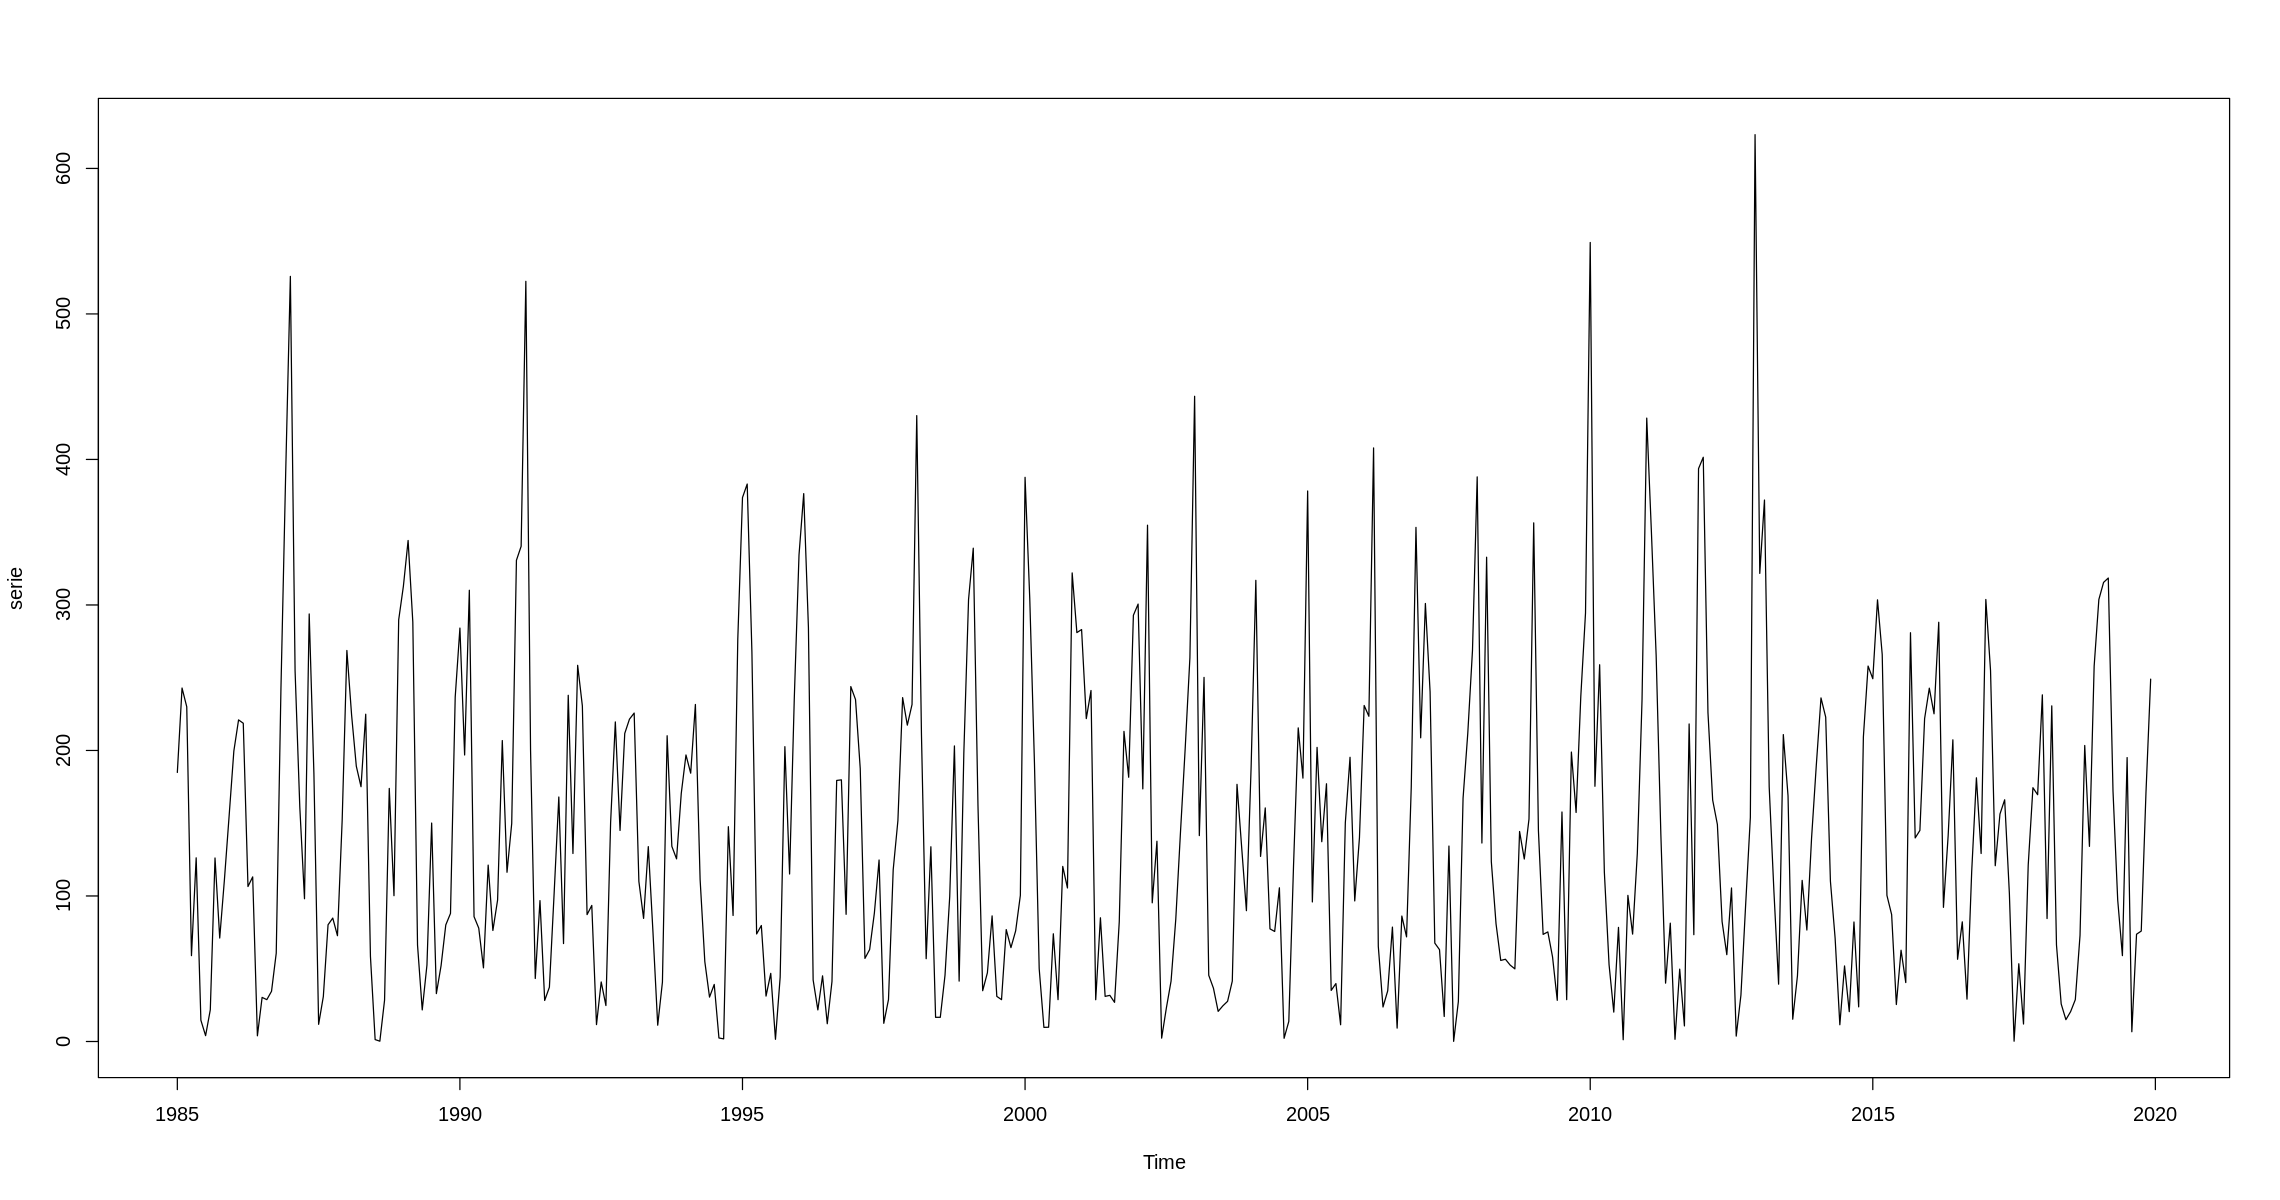

In [107]:
plot(serie)

####4-ANÁLISE TRANSFORMAÇÃO DA SÉRIE TEMPORAL

In [108]:
#ANÁLISE DE DECOMPOSIÇÃO DA SÉRIE
decomposicao<-
  decompose(serie)

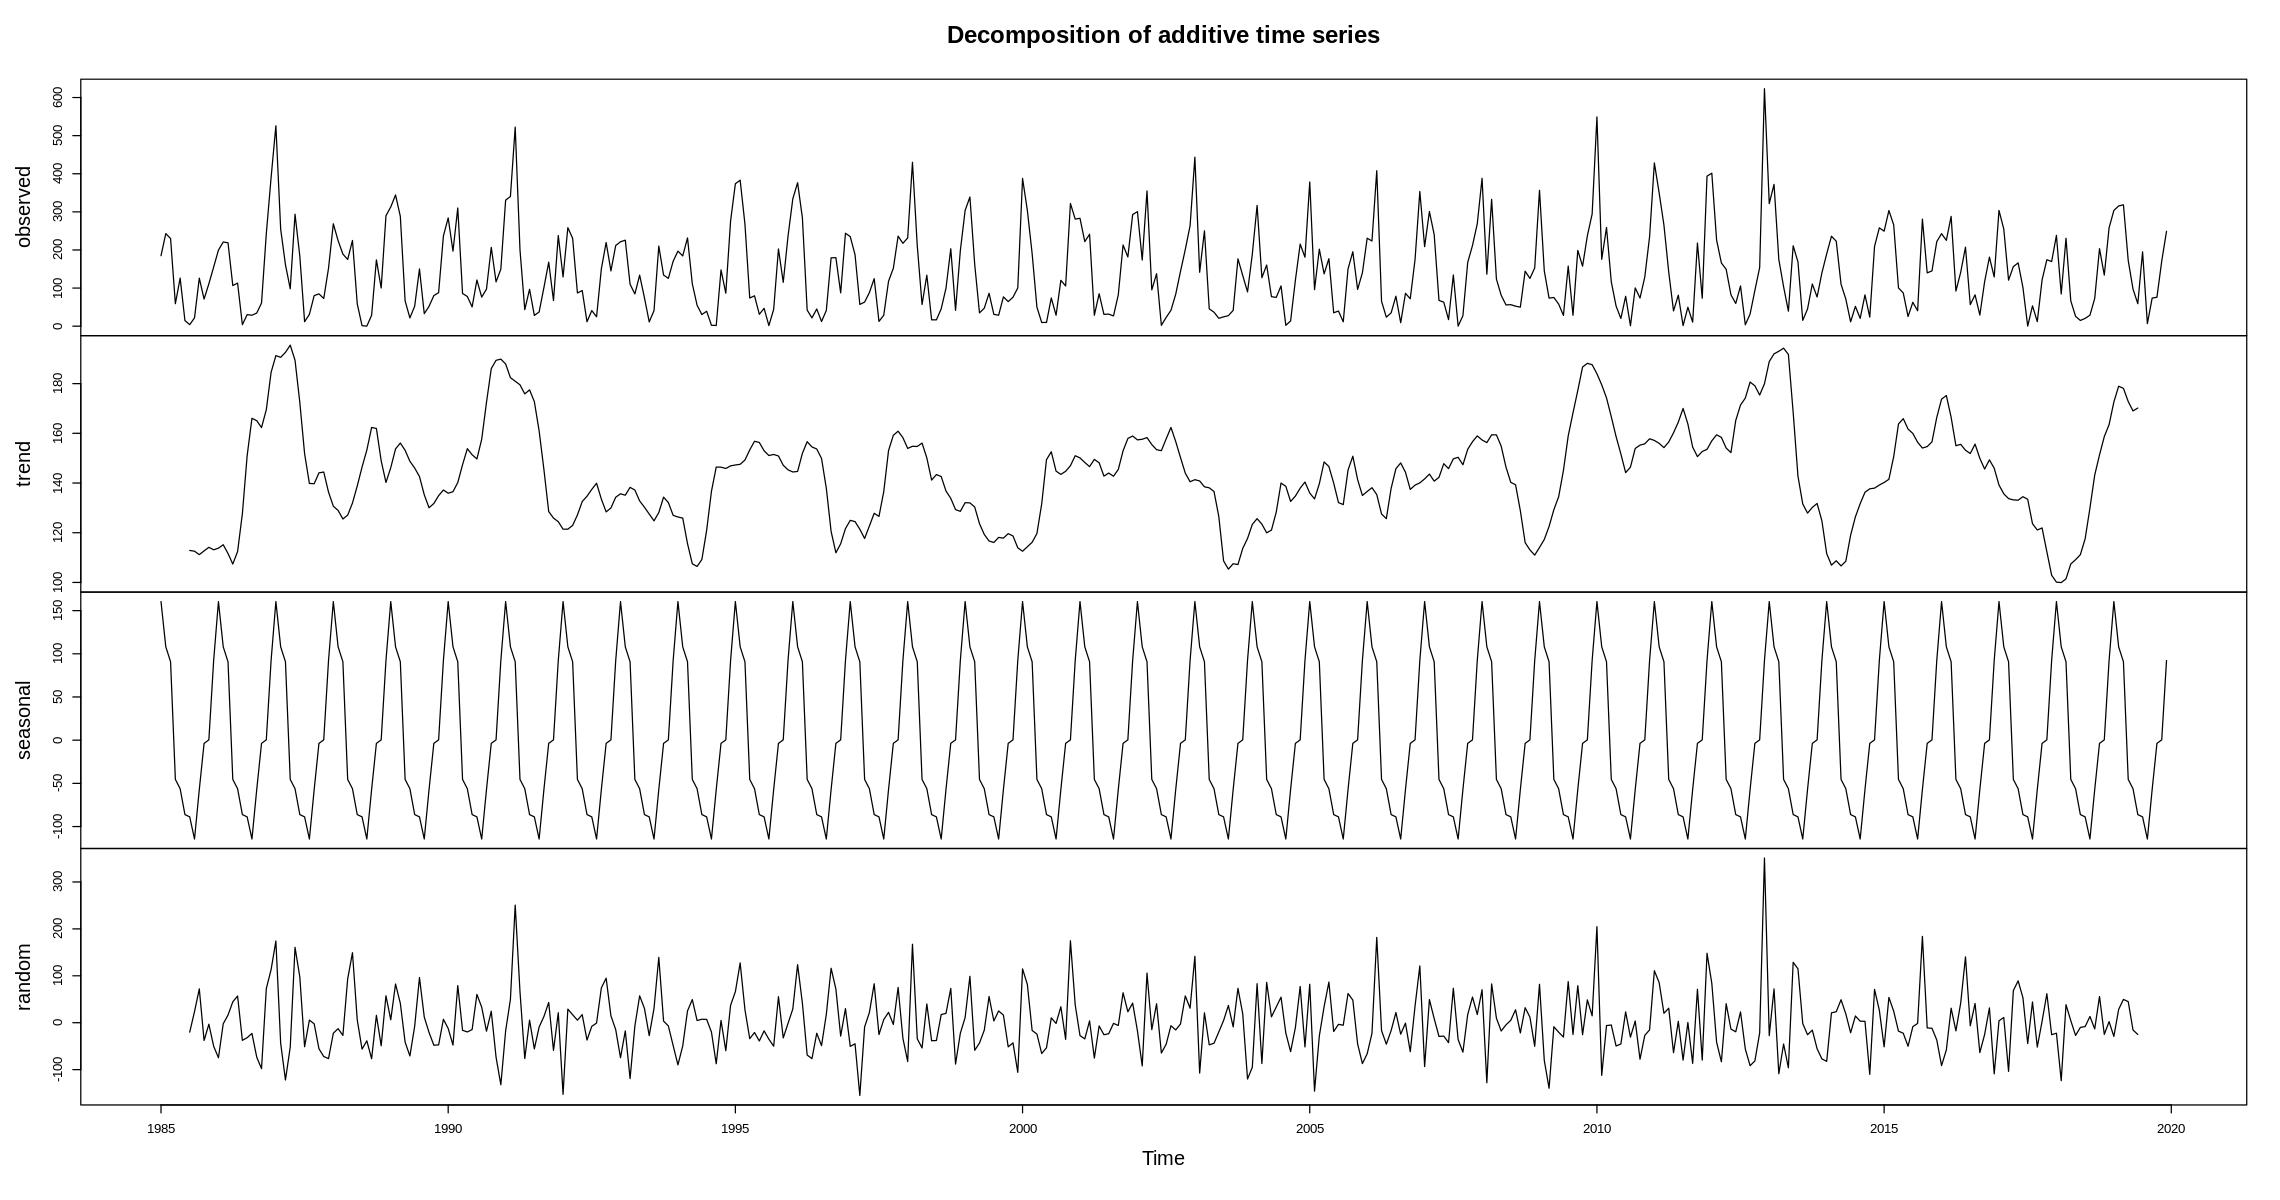

In [109]:
plot(decomposicao)

In [110]:
#suavização
serie2<-
  tsclean(serie)

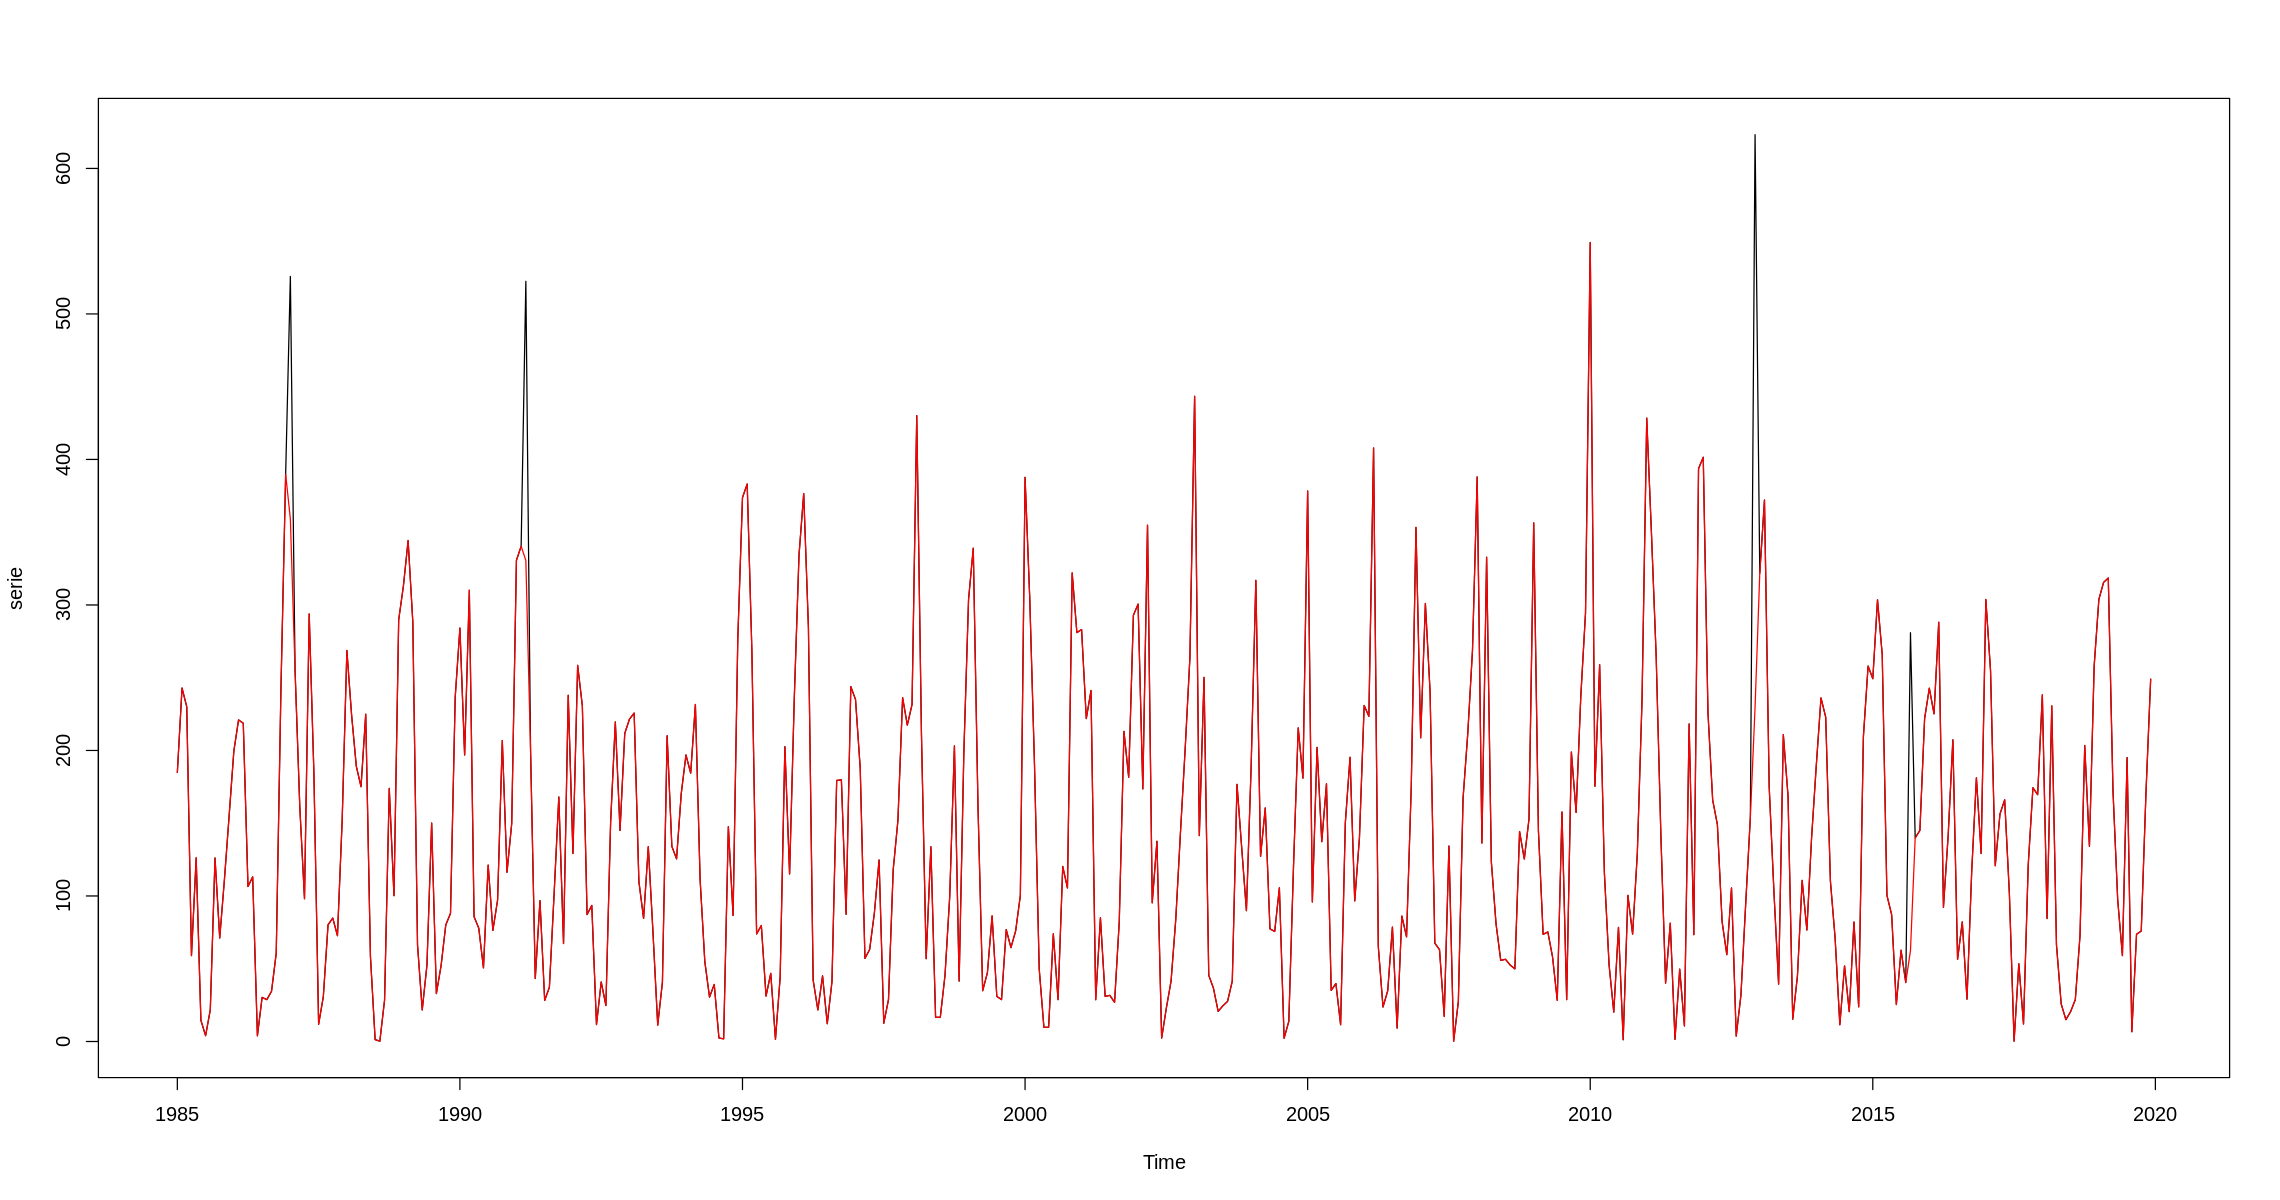

In [111]:
# Comparação
plot(serie)
lines(serie2, col="red")

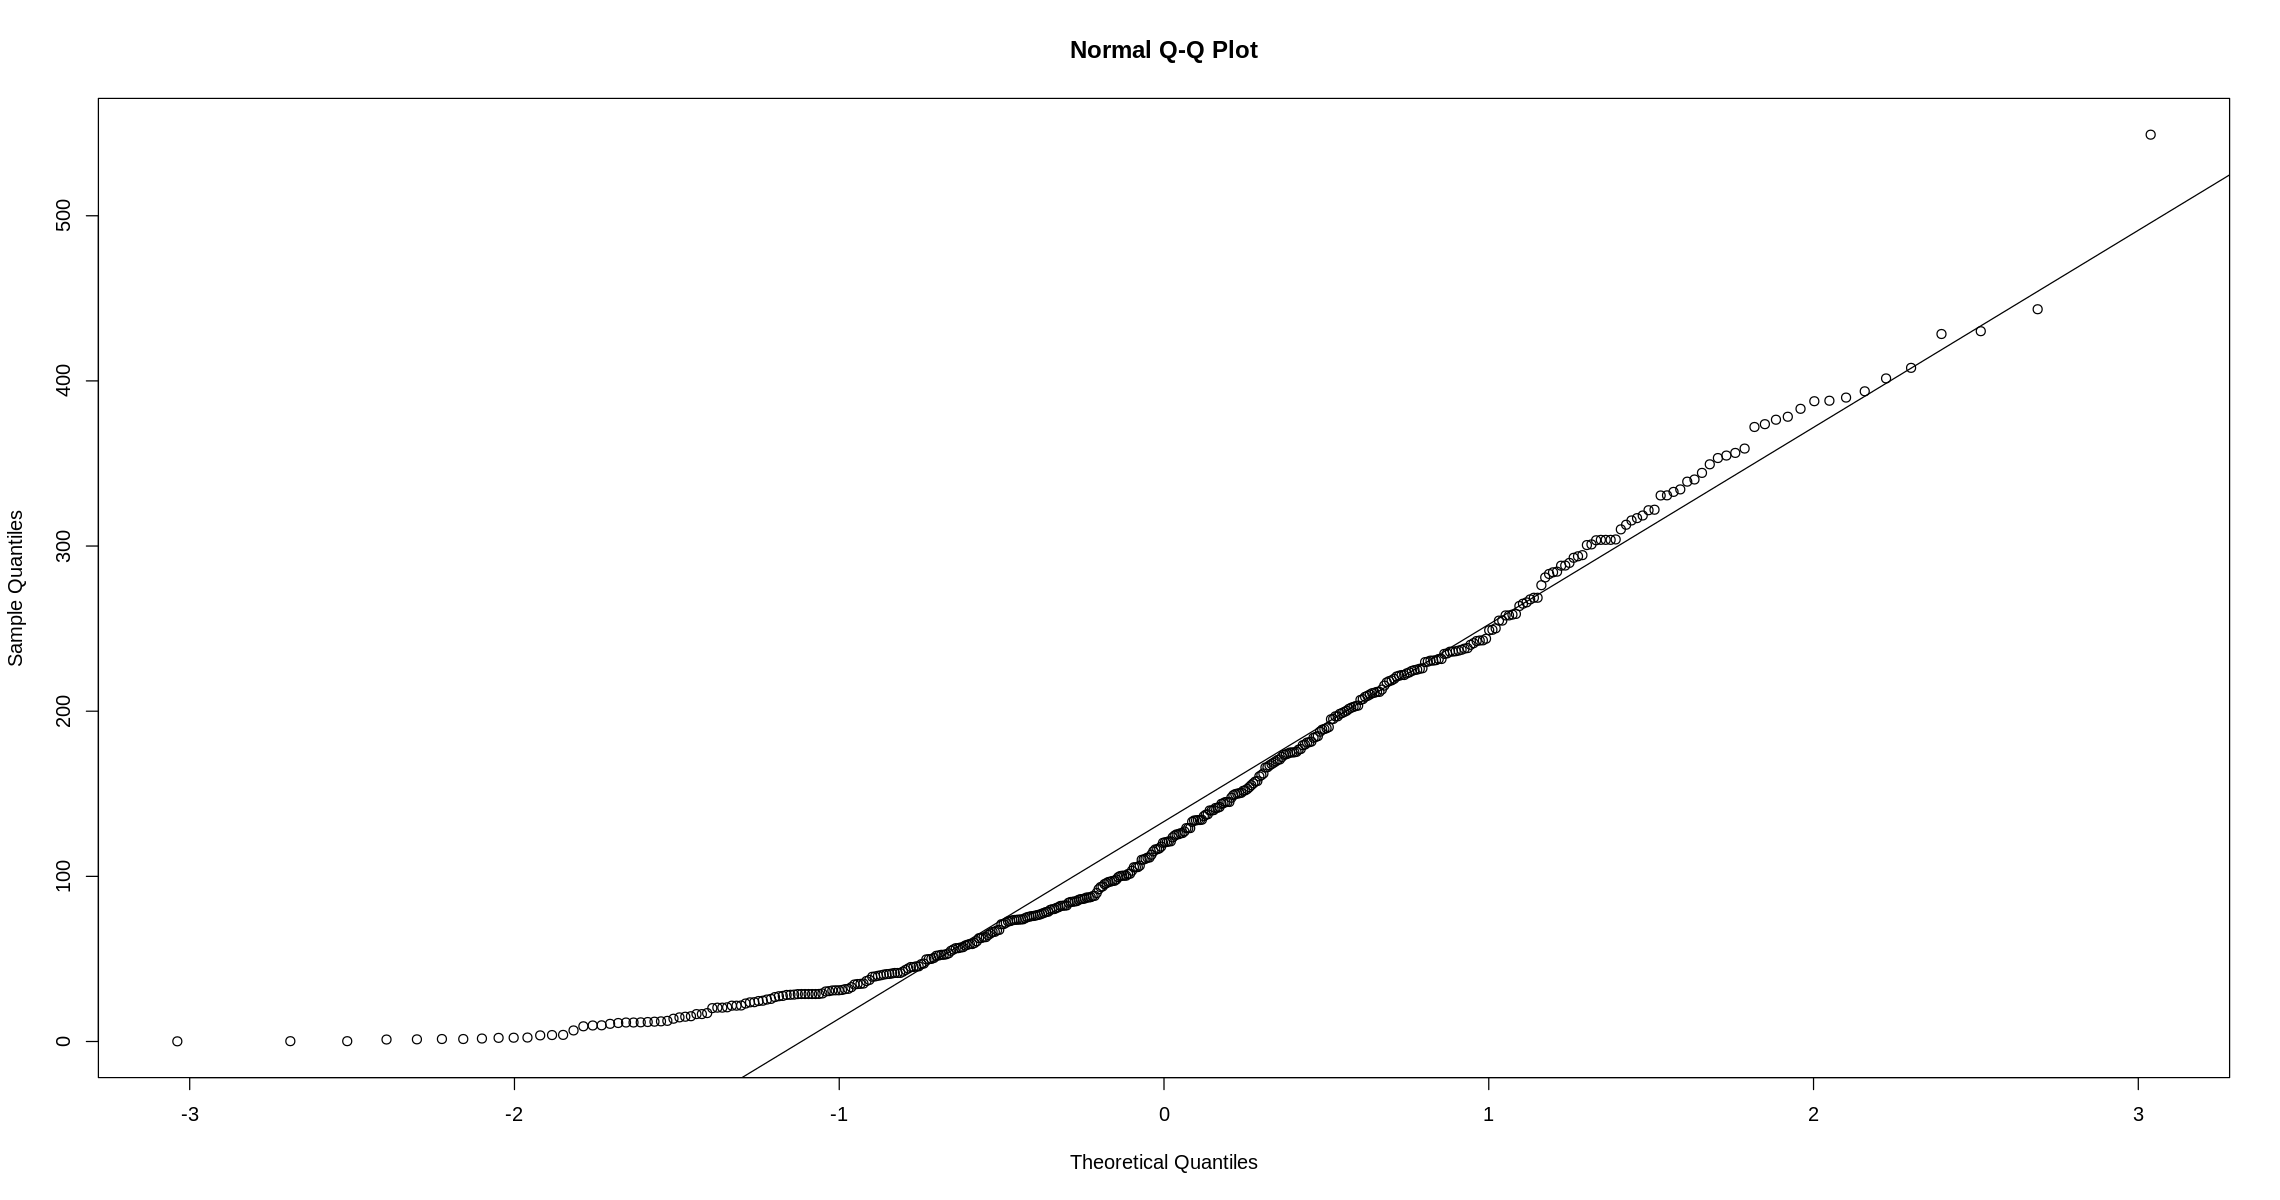

In [112]:
### NORMALIDADE
qqnorm(serie2)
qqline(serie2)

In [114]:
#transformação para a normaidade da serie
#os dados serão elevados a 1/3
serie3<-
  sign(serie2)*abs(serie2)^(1/3)
print(serie3)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1985 5.6969924 6.2393954 6.1269257 3.8929964 5.0159491 2.4440924 1.5874011
1986 5.8441342 6.0459436 6.0248966 4.7400531 4.8360138 1.5740609 3.1175556
1987 7.1074131 6.3401552 5.4434987 4.6120039 6.6478916 5.6867034 2.2766381
1988 6.4529142 6.0767908 5.7408171 5.5945099 6.0813008 3.8841787 1.0913929
1989 6.7889382 7.0088324 6.6053828 4.0473539 2.7892445 3.7444362 5.3144733
1990 6.5739099 5.8176632 6.7686271 4.4105806 4.2708320 3.6987091 4.9488111
1991 6.9153059 6.9815842 6.9148007 5.8509580 3.5115266 4.5915408 3.0438018
1992 5.0553843 6.3702066 6.1324834 4.4344405 4.5387598 2.2637024 3.4454115
1993 6.0504997 6.0885029 4.7914199 4.3899218 5.1159567 4.2115329 2.2373779
1994 5.8176632 5.6918525 6.1411002 4.8116615 3.8006462 3.1243999 3.3969985
1995 7.2035476 7.2627994 6.4448991 4.1964445 4.3034765 3.1481218 3.6036999
1996 6.9403088 7.2208501 6.5769937 3.4842833 2.7892445 3.5595261 2.3020775
1997 6.1710058 5.7245886 

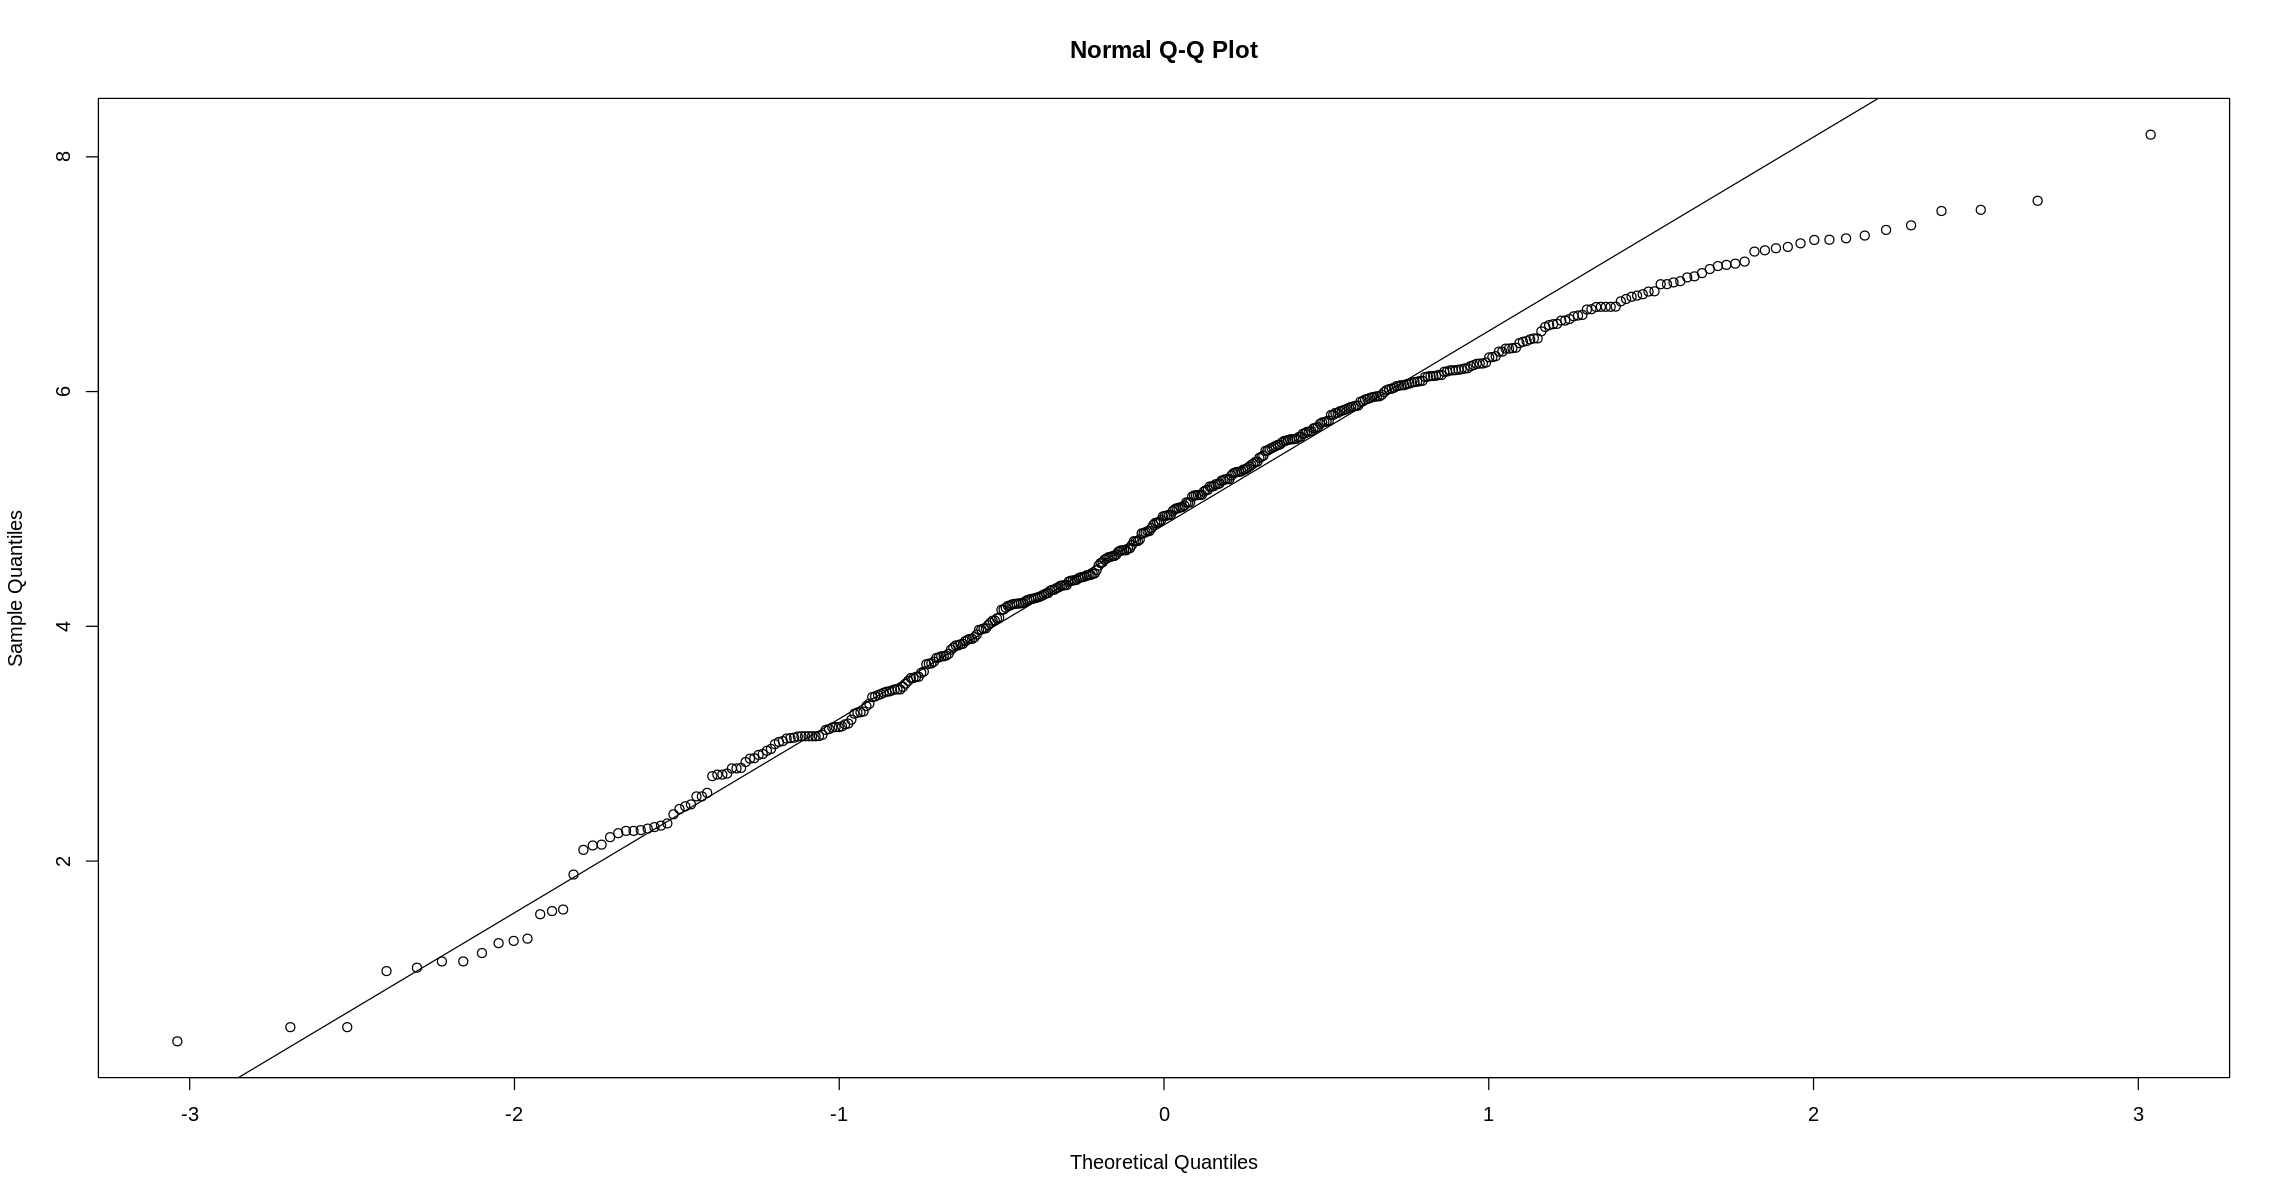

In [115]:
### NORMALIDADE
qqnorm(serie3)
qqline(serie3)

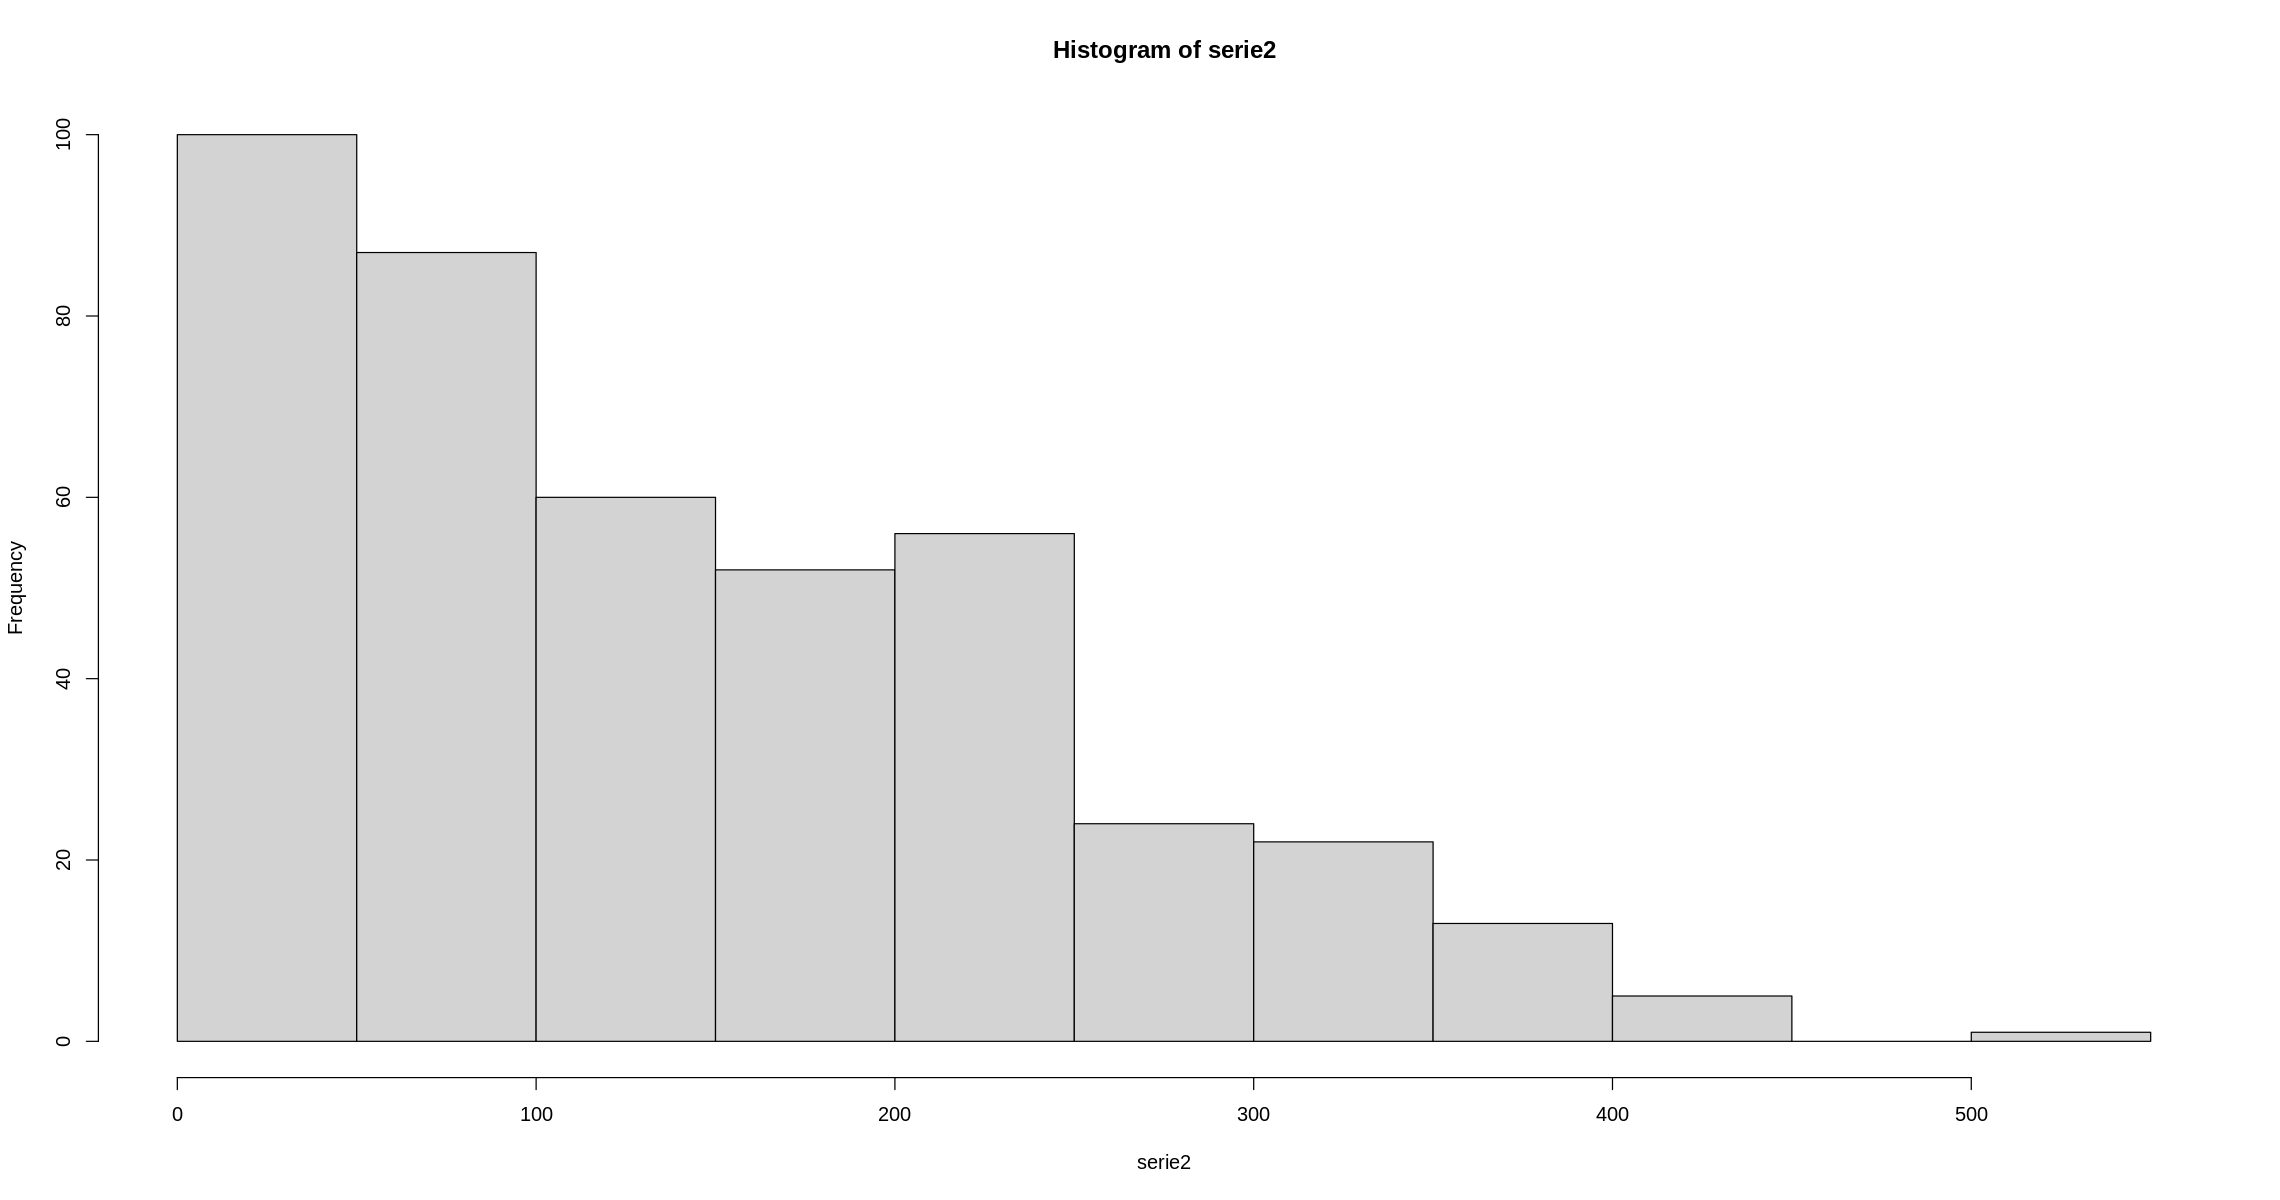

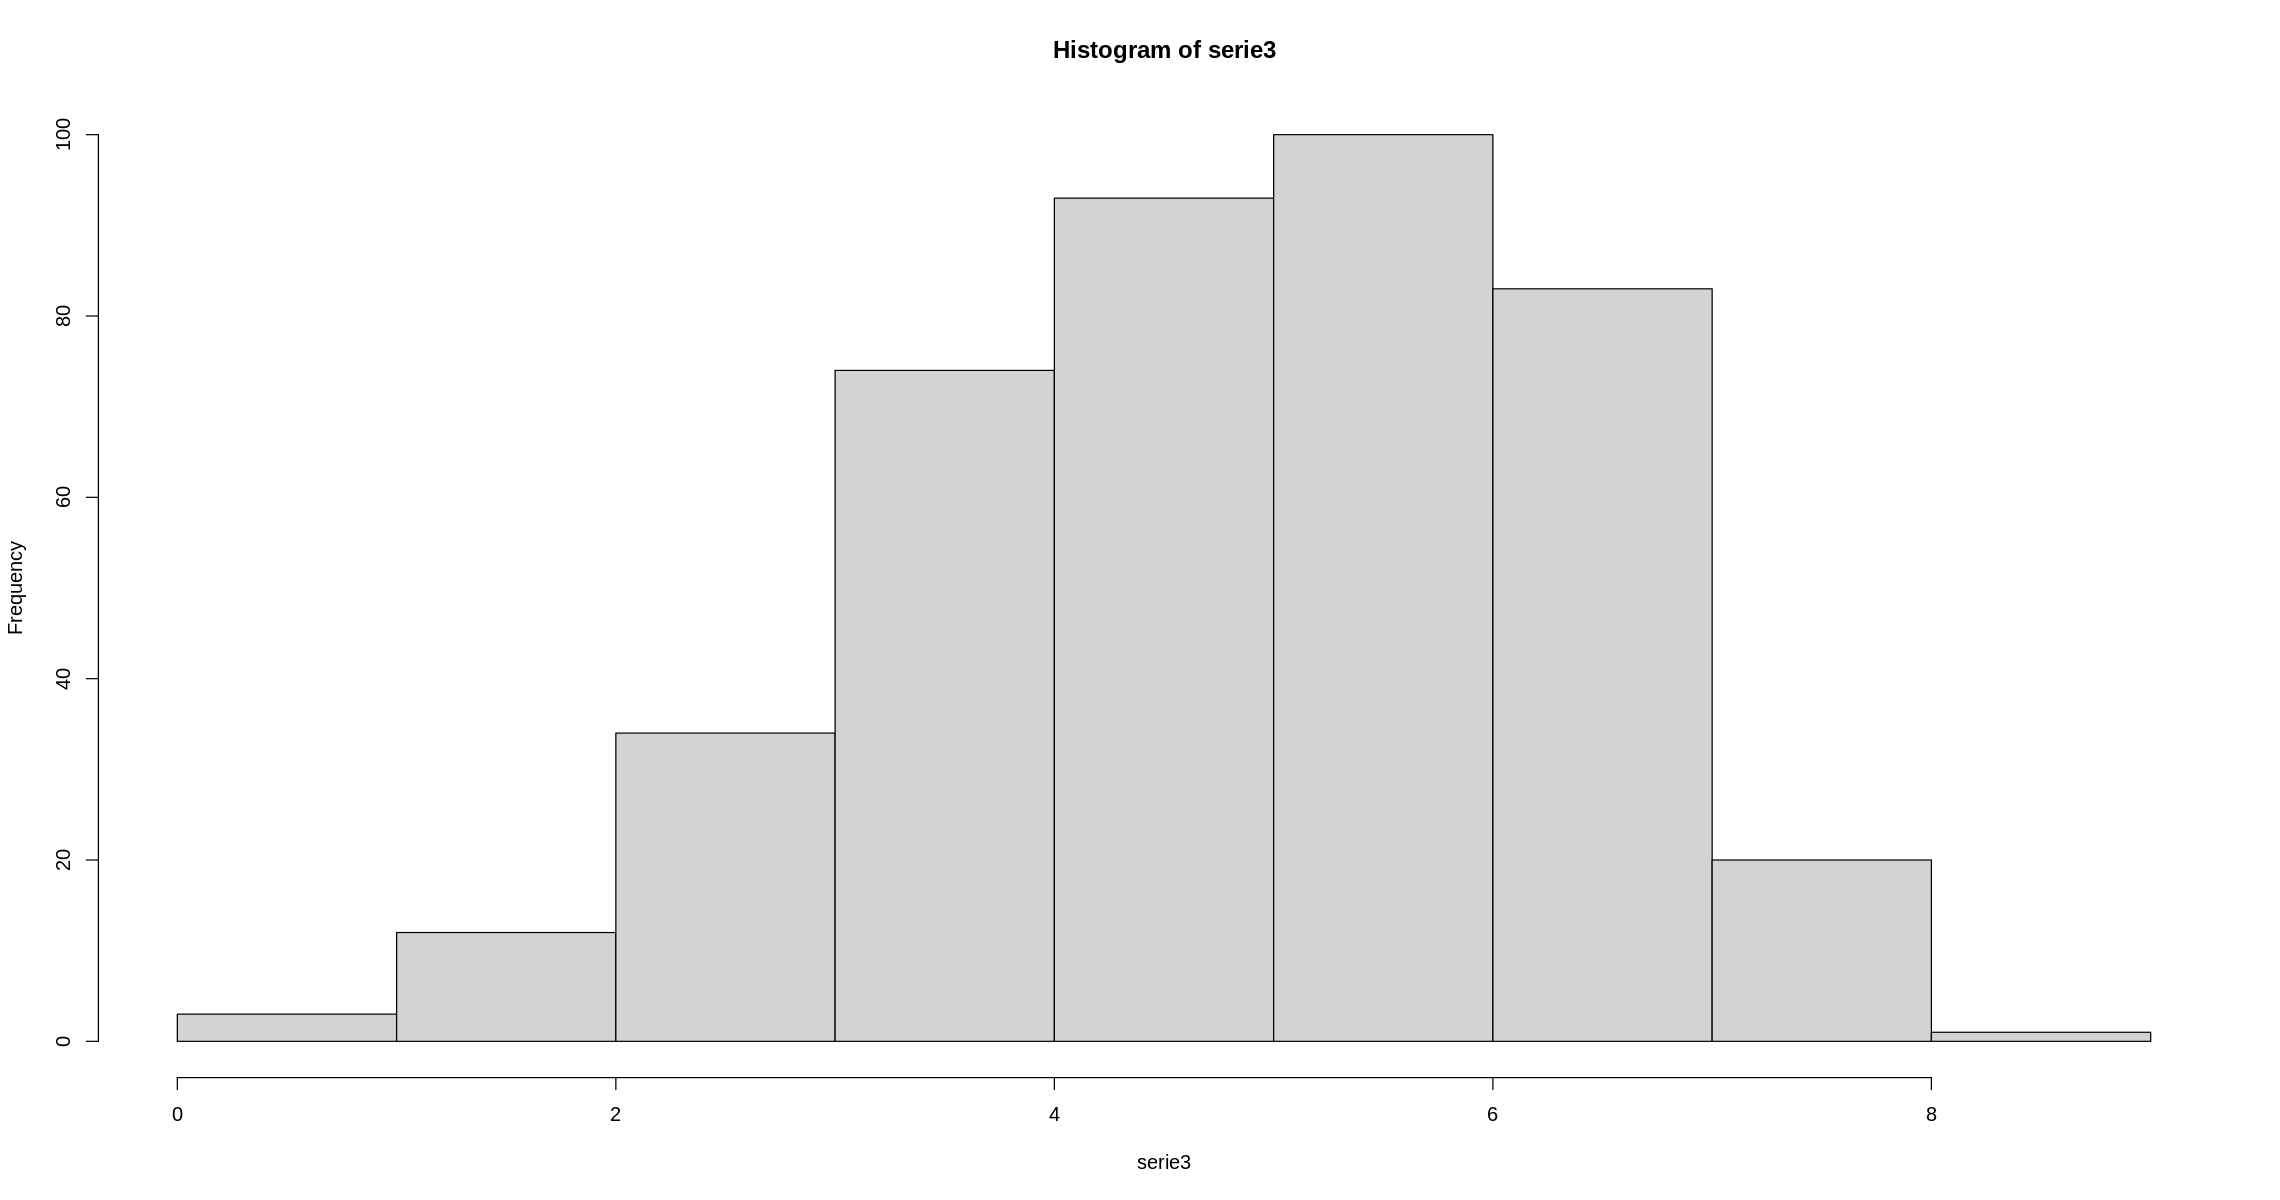

In [116]:
hist(serie2)
hist(serie3)

In [160]:
# Ho = distribuição normal : p > 0.05
# Ha = distribuição != normal : p <= 0.05
shapiro.test(serie2)


	Shapiro-Wilk normality test

data:  serie2
W = 0.93542, p-value = 1.61e-12


In [117]:
# Ho = distribuição normal : p > 0.05
# Ha = distribuição != normal : p <= 0.05
shapiro.test(serie3)


	Shapiro-Wilk normality test

data:  serie3
W = 0.98176, p-value = 3.857e-05


In [ ]:
#a serie ainda não é normal, mesmo após as transforações

In [118]:
#VERIFICAÇÃO DA ESTACIONARIDADE DA SERIE
# Teste pp (Philips-Perron)

# Ho = é estacionária: p > 0.05
# Ha = não é estacionária: p <= 0.05
estacionaridade <-
  ur.pp(serie3)
summary(estacionaridade)


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5003 -0.7443  0.1453  0.9695  2.8522 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.29178    0.20983   10.92   <2e-16 ***
y.l1         0.52190    0.04182   12.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.279 on 417 degrees of freedom
Multiple R-squared:  0.272,	Adjusted R-squared:  0.2702 
F-statistic: 155.8 on 1 and 417 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-alpha  is: -195.2759 

         aux. Z statistics
Z-tau-mu           10.8266


In [ ]:
#A SÉRIE NÃO É ESTACIONÁRIA

In [119]:
#VERIFICAÇÃO DA QUANTIDADE DE DIFERENCIAÇÕES QUE PODEM SER REALIZADAS PARA
#TORNAR A SÉRIE ESTACIONÁRIA
ndiffs(serie3)

[1] 0

In [ ]:
#desta forma, não há como tornar a série estacionária

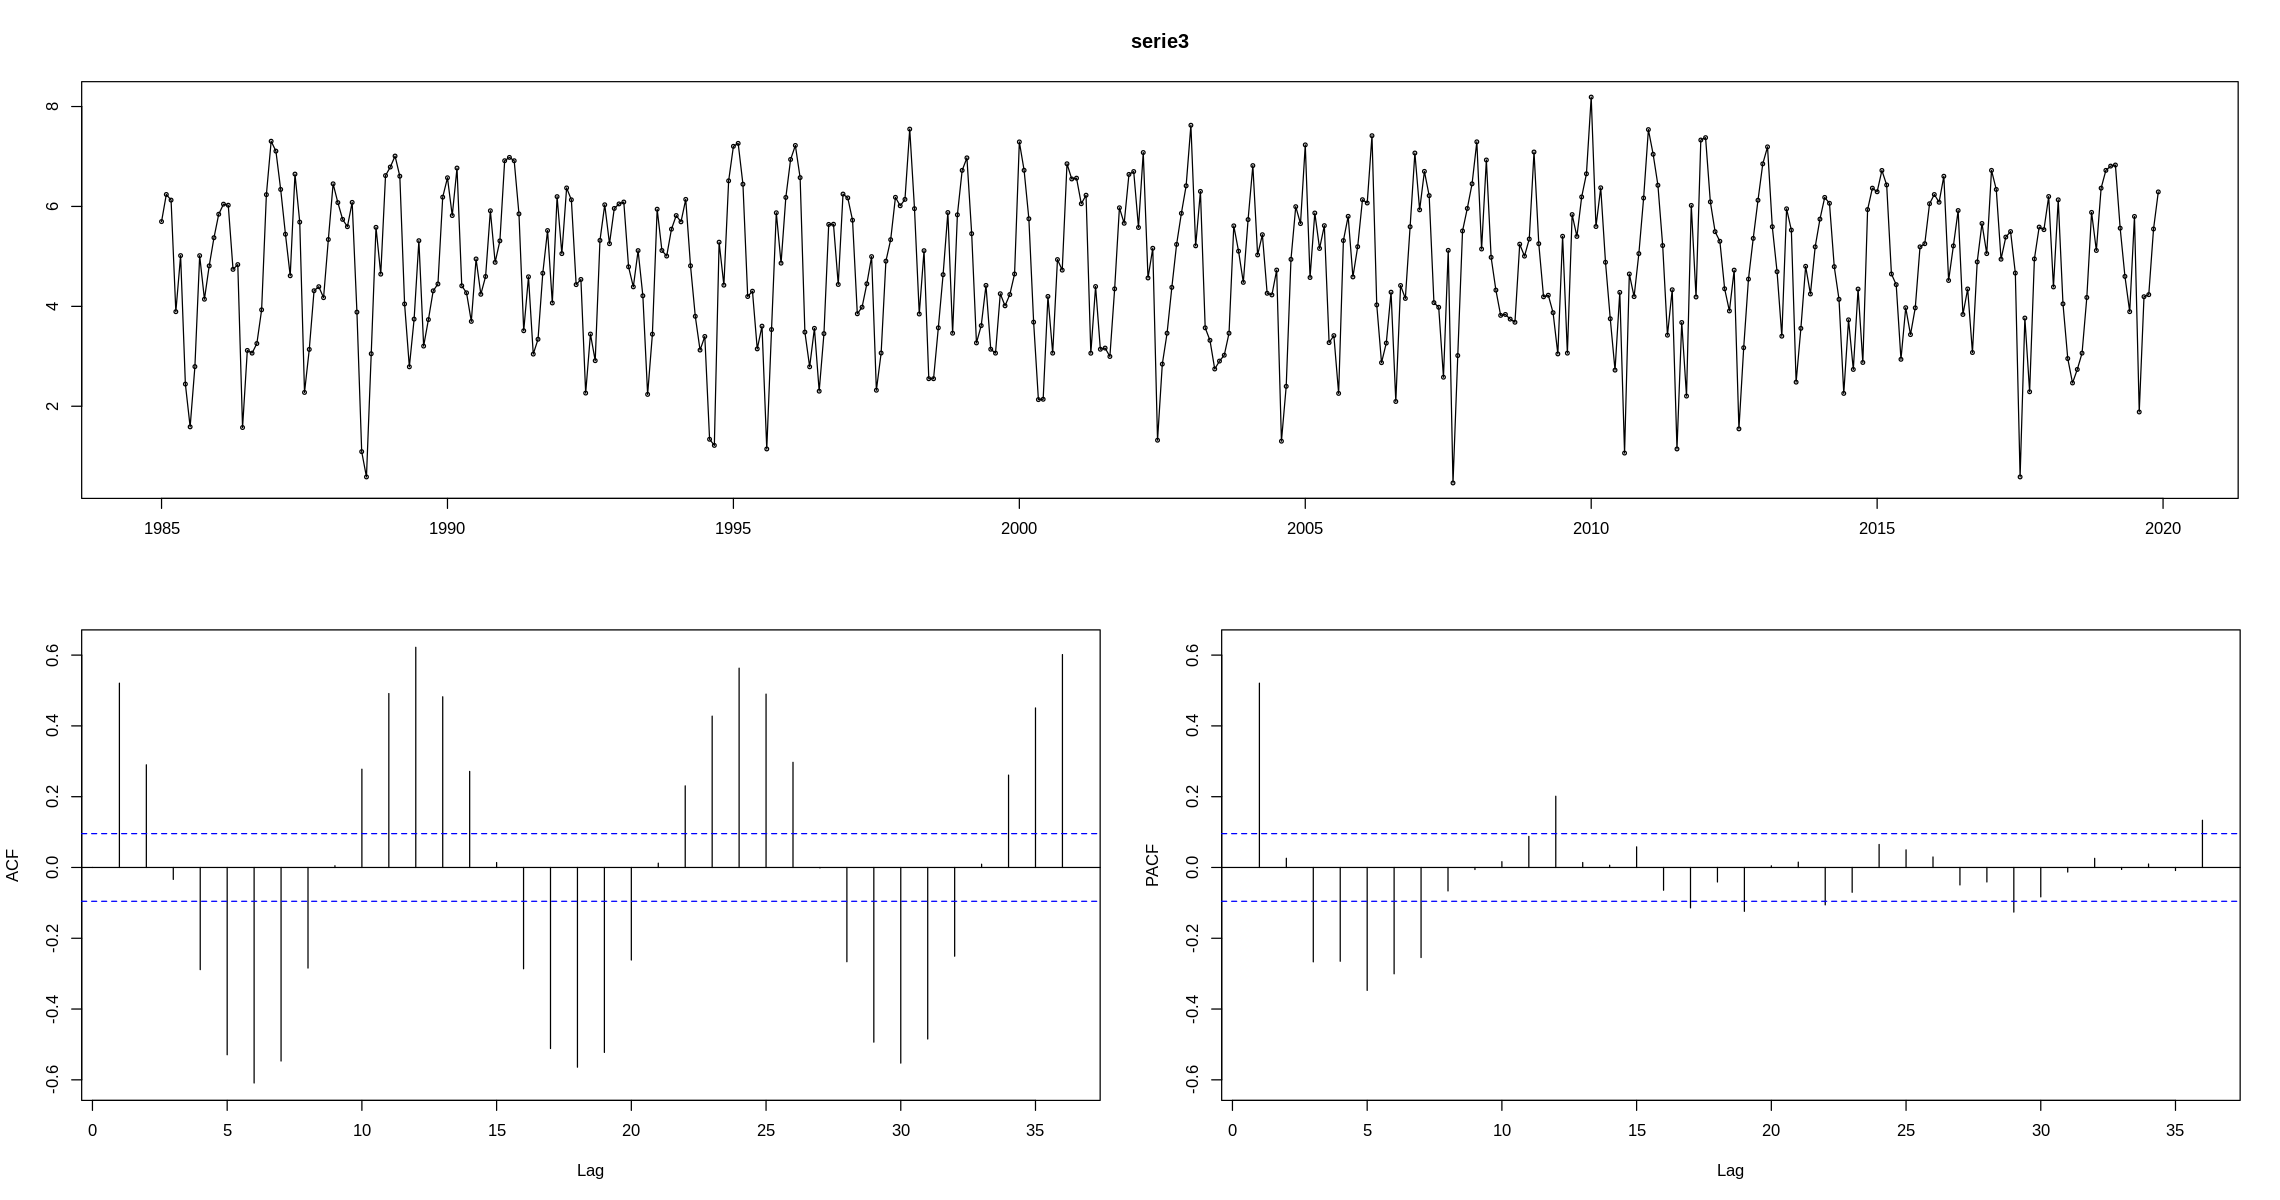

In [120]:
#AUTOCORRELAÇÃO
tsdisplay(serie3)

In [121]:
#gráficos de acf e pacf apresentando correlação entre os dados além de sazonalidade nos lags
#dados estão fora dos limites

In [122]:
# Teste de Autocorrelação (Ljung-Box)
# Ho = não é autocorrelacionado: p > 0.05
# Ha = é autocorrelacionado: p <= 0.05
Box.test(serie3, type = "Ljung-Box")


	Box-Ljung test

data:  serie3
X-squared = 114.67, df = 1, p-value < 2.2e-16


In [ ]:
#pelo teste estatístico que os dados da série são autocorrelacionados

####5-CRIAÇÃO DOS MODELOS

####5.2-CRIAÇÃO DO AUTOARIMA

In [123]:
#UTILIZAÇÃO DO AUTOARIMA PARA IDENTIFICAR QUAL É O MELHOR MODELO A SER UTILIZADO
modelo_auto<-
  auto.arima(serie3,trace = T, stepwise = F,approximation = F,
  max.p = 5, max.q = 5, max.P = 2, max.Q = 2)


 ARIMA(0,0,0)(0,1,0)[12]                    : 1353.697
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 1355.587
 ARIMA(0,0,0)(0,1,1)[12]                    : Inf
 ARIMA(0,0,0)(0,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,2)[12]                    : Inf
 ARIMA(0,0,0)(0,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,0)[12]                    : 1269.773
 ARIMA(0,0,0)(1,1,0)[12] with drift         : 1271.674
 ARIMA(0,0,0)(1,1,1)[12]                    : Inf
 ARIMA(0,0,0)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,2)[12]                    : Inf
 ARIMA(0,0,0)(1,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(2,1,0)[12]                    : 1200.526
 ARIMA(0,0,0)(2,1,0)[12] with drift         : 1202.469
 ARIMA(0,0,0)(2,1,1)[12]                    : Inf
 ARIMA(0,0,0)(2,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(2,1,2)[12]                    : Inf
 ARIMA(0,0,0)(2,1,2)[12] with drift         : Inf
 ARIMA(0,0,1)(0,1,0)[12]                    : 1354.286
 ARIMA(0,0,1)(

In [124]:
summary(modelo_auto)

Series: serie3 
ARIMA(0,0,3)(2,1,0)[12] 

Coefficients:
         ma1     ma2      ma3     sar1     sar2
      0.0484  0.0276  -0.1259  -0.6208  -0.4217
s.e.  0.0496  0.0518   0.0500   0.0461   0.0471

sigma^2 = 1.067:  log likelihood = -593.31
AIC=1198.62   AICc=1198.83   BIC=1222.68

Training set error measures:
                    ME     RMSE       MAE       MPE     MAPE      MASE
Training set 0.0236105 1.011889 0.7757109 -7.603956 22.97964 0.7806618
                   ACF1
Training set 0.00451244

In [ ]:
#AIC DE 1198, RMSE DE 1.011 E MAPE DE 22.97

In [125]:
#CRIANDO OUTRO MODELO
modelo_auto2<-
  auto.arima(serie3,trace = T, stepwise = F,approximation = F,
  max.p = 10, max.q = 10, max.P = 4, max.Q = 4)


 ARIMA(0,0,0)(0,1,0)[12]                    : 1353.697
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 1355.587
 ARIMA(0,0,0)(0,1,1)[12]                    : Inf
 ARIMA(0,0,0)(0,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,2)[12]                    : Inf
 ARIMA(0,0,0)(0,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,3)[12]                    : Inf
 ARIMA(0,0,0)(0,1,3)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,4)[12]                    : Inf
 ARIMA(0,0,0)(0,1,4)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,0)[12]                    : 1269.773
 ARIMA(0,0,0)(1,1,0)[12] with drift         : 1271.674
 ARIMA(0,0,0)(1,1,1)[12]                    : Inf
 ARIMA(0,0,0)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,2)[12]                    : Inf
 ARIMA(0,0,0)(1,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,3)[12]                    : Inf
 ARIMA(0,0,0)(1,1,3)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,4)[12]                    : Inf
 ARIMA(0,0,0)(1,1,4)[12] with

In [126]:
summary(modelo_auto2)

Series: serie3 
ARIMA(0,0,0)(4,1,0)[12] 

Coefficients:
         sar1     sar2     sar3     sar4
      -0.7863  -0.7008  -0.4160  -0.2043
s.e.   0.0498   0.0614   0.0618   0.0524

sigma^2 = 0.968:  log likelihood = -576.19
AIC=1162.38   AICc=1162.53   BIC=1182.43

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.02899418 0.9649262 0.7253419 -7.82795 22.20297 0.7299713
                   ACF1
Training set 0.06626479

In [ ]:
#AIC 1162 RMSE 0,96 E MAPE DE 22.2

In [ ]:
#SERÃO USADOS OS MODELOS ARIMA CRIADOS NO AUTOAARIMA
#ARIMA(0,0,0)(4,1,0)
#ARIMA(0,0,3)(2,1,0)



####5.1-CRIAÇÃO DO SARIMA
----MODELO SARIMA: (p,d,q)(P,D,Q)

In [127]:
modelo_sarima<-
  arima(serie3, order = c(0,0,3), seasonal = c(2,1,0))
  summary(modelo_sarima)


Call:
arima(x = serie3, order = c(0, 0, 3), seasonal = c(2, 1, 0))

Coefficients:
         ma1     ma2      ma3     sar1     sar2
      0.0484  0.0276  -0.1259  -0.6208  -0.4217
s.e.  0.0496  0.0518   0.0500   0.0461   0.0471

sigma^2 estimated as 1.054:  log likelihood = -593.31,  aic = 1198.62

Training set error measures:
                    ME     RMSE       MAE       MPE     MAPE      MASE
Training set 0.0236105 1.011889 0.7757109 -7.603956 22.97964 0.6741581
                   ACF1
Training set 0.00451244

In [128]:
#aic = 1198.62

In [129]:
modelo_sarima2<-
  arima(serie3, order = c(0,0,0), seasonal = c(4,1,0))
  summary(modelo_sarima2)


Call:
arima(x = serie3, order = c(0, 0, 0), seasonal = c(4, 1, 0))

Coefficients:
         sar1     sar2     sar3     sar4
      -0.7863  -0.7008  -0.4160  -0.2043
s.e.   0.0498   0.0614   0.0618   0.0524

sigma^2 estimated as 0.9585:  log likelihood = -576.19,  aic = 1162.38

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.02899418 0.9649262 0.7253419 -7.82795 22.20297 0.6303832
                   ACF1
Training set 0.06626479

In [130]:
#aic = 1162.38

In [ ]:
# O MODELO SARIMA 2 POSSUEM OS VALORES DE AIC, RMSE e MAPE MELHORES QUE O MODELO 1


	Ljung-Box test

data:  Residuals from ARIMA(0,0,3)(2,1,0)[12]
Q* = 30.414, df = 19, p-value = 0.04677

Model df: 5.   Total lags used: 24



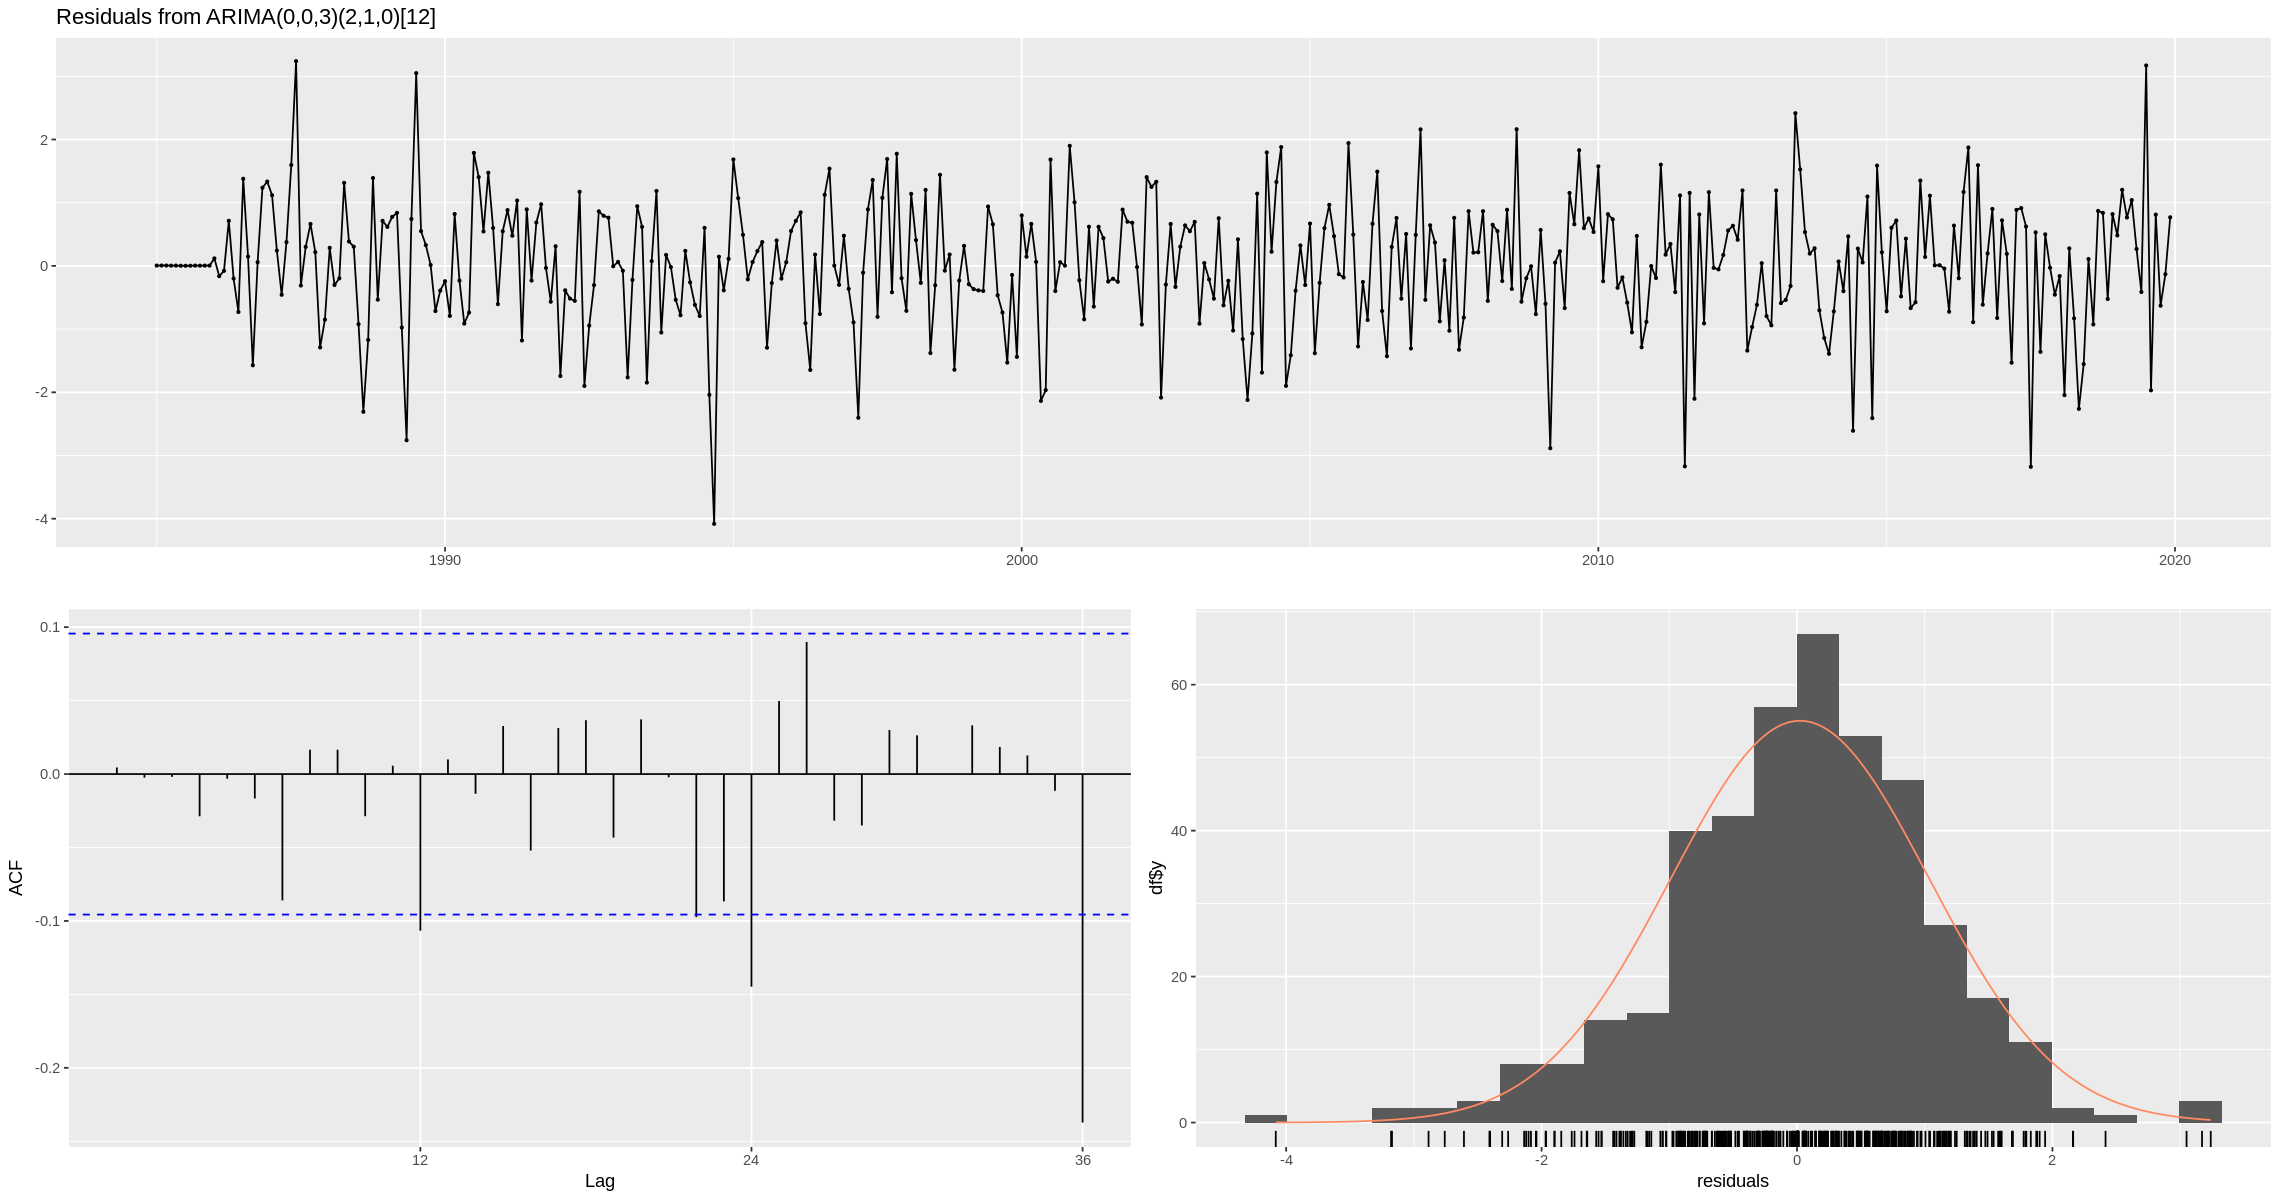

In [131]:
#ANÁLISE DOS RESÍDUOS
checkresiduals(modelo_sarima)


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(4,1,0)[12]
Q* = 32.331, df = 20, p-value = 0.0399

Model df: 4.   Total lags used: 24



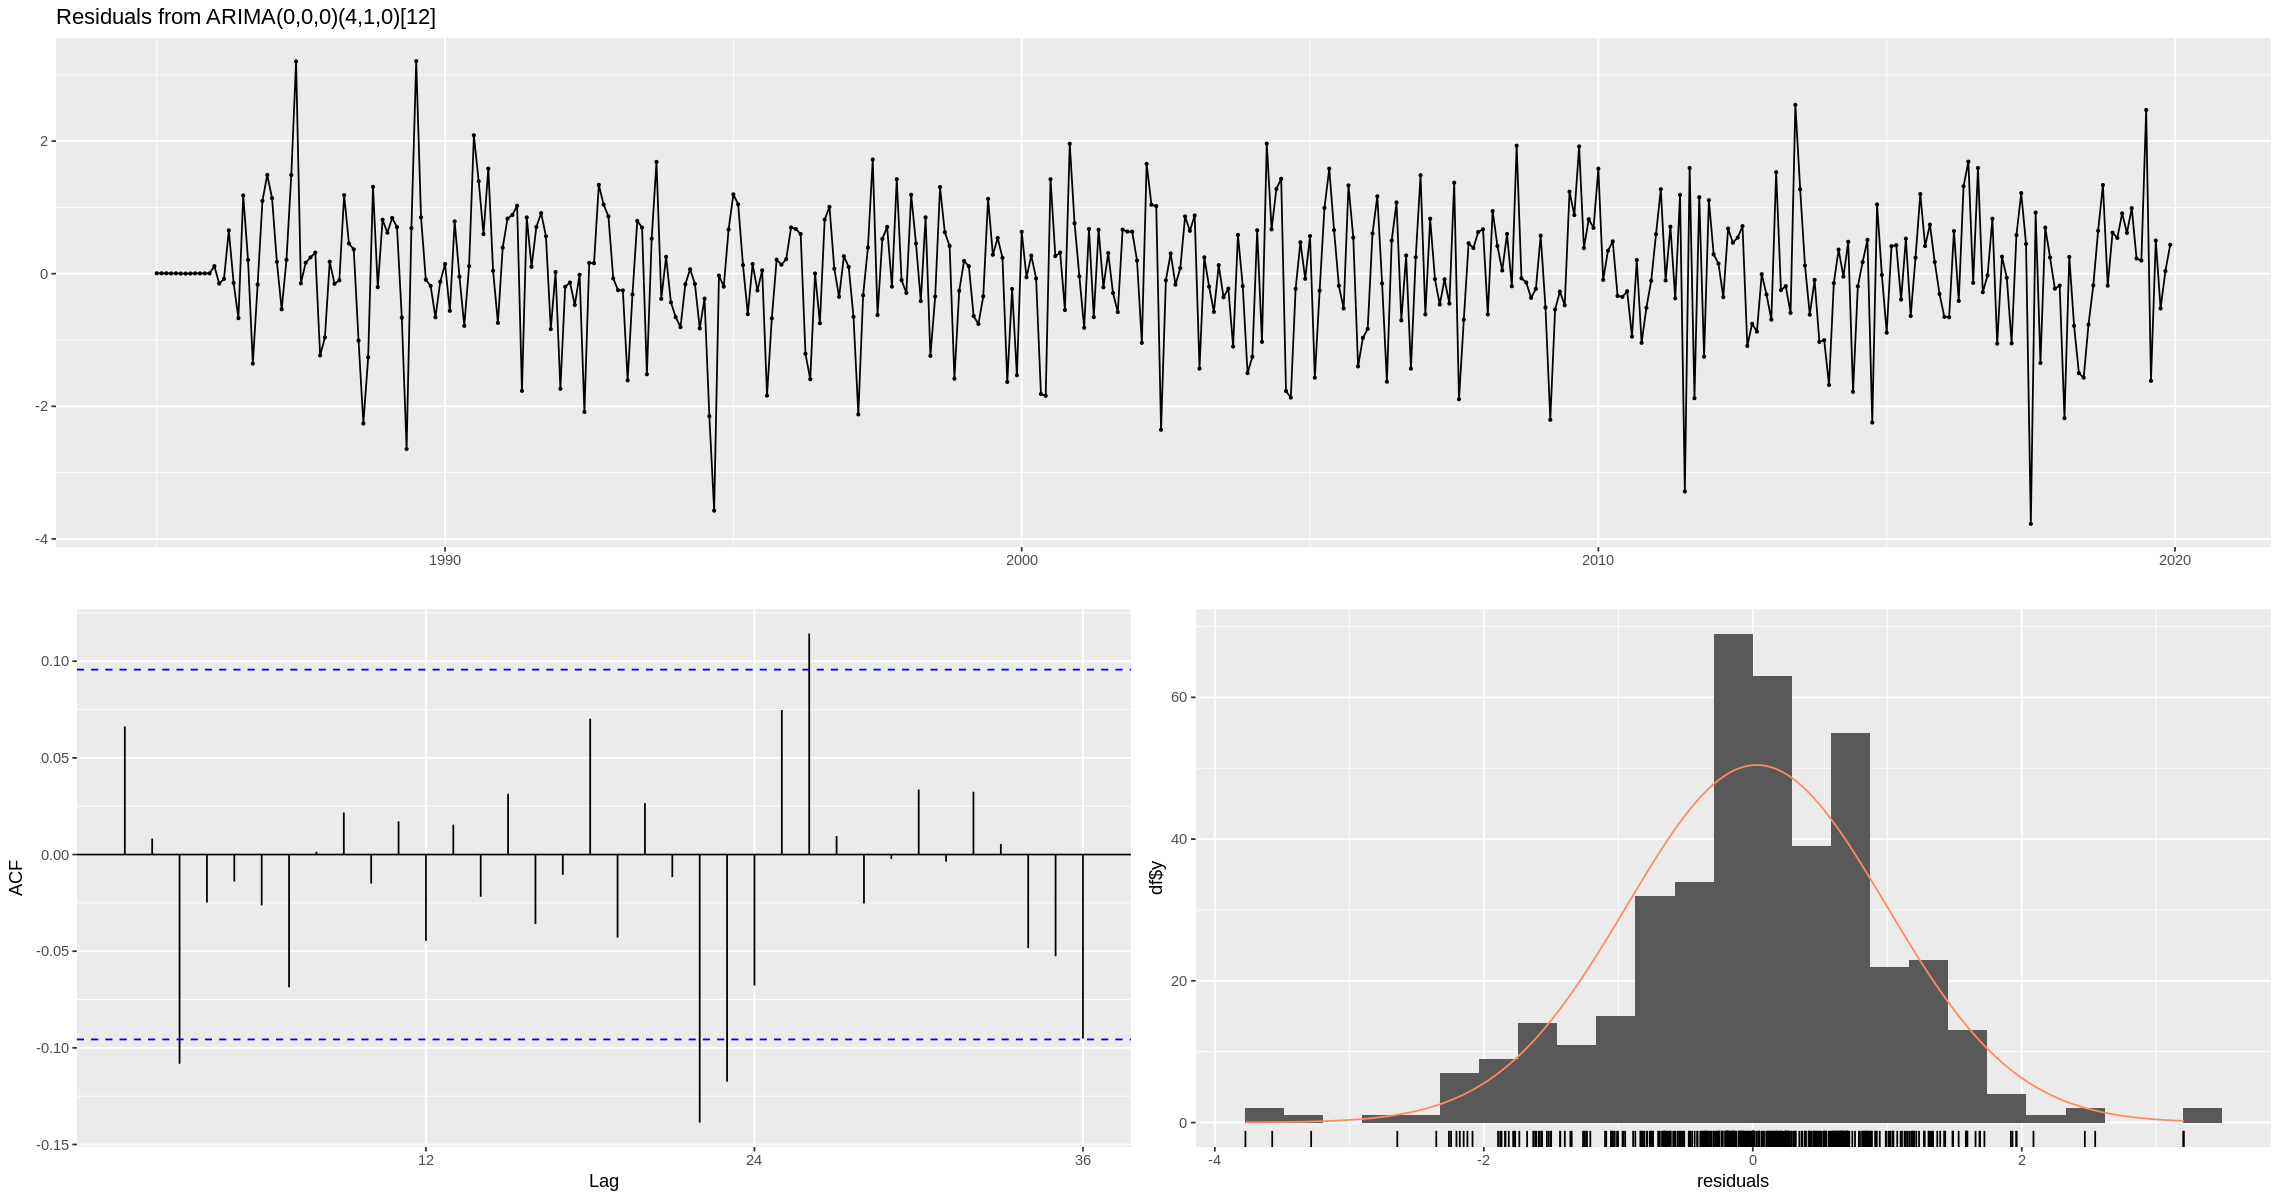

In [132]:
#ANÁLISE DOS RESÍDUOS
checkresiduals(modelo_sarima2)

In [ ]:
#EM AMBOS MODELOS A MÉDIA É APROXIMADAMENTE 0

In [ ]:
#A VARIÂNCIA APARENTEMENTE SE APRESETA CONSTANTE

In [ ]:
#EM AMBOS MODELOS HÁ RESÍDUOS FORA DO LIMITE
#CONTUDO, EM GRANDE PARTE OS RESÍDUOS NÃO ESTÃO AUTOCORRELACIONADOS

In [133]:
# Ho = distribuição normal : p > 0.05
# Ha = distribuição != normal : p <= 0.05
shapiro.test(resid(modelo_sarima))


	Shapiro-Wilk normality test

data:  resid(modelo_sarima)
W = 0.98588, p-value = 0.0004153


In [134]:
shapiro.test(resid(modelo_sarima2))


	Shapiro-Wilk normality test

data:  resid(modelo_sarima2)
W = 0.97989, p-value = 1.423e-05


In [ ]:
#EM AMBOS CASOS OS RESÍDUOS NÃO NÃO NORMAIS
#CONTUDO NO MODELO 1 P P-VALUE ESTÁ MAIS PRÓXIMO DE 5%

In [ ]:
#APESAR DISSO, OS 2 MODELOS PODEM SER UTILIZADOS

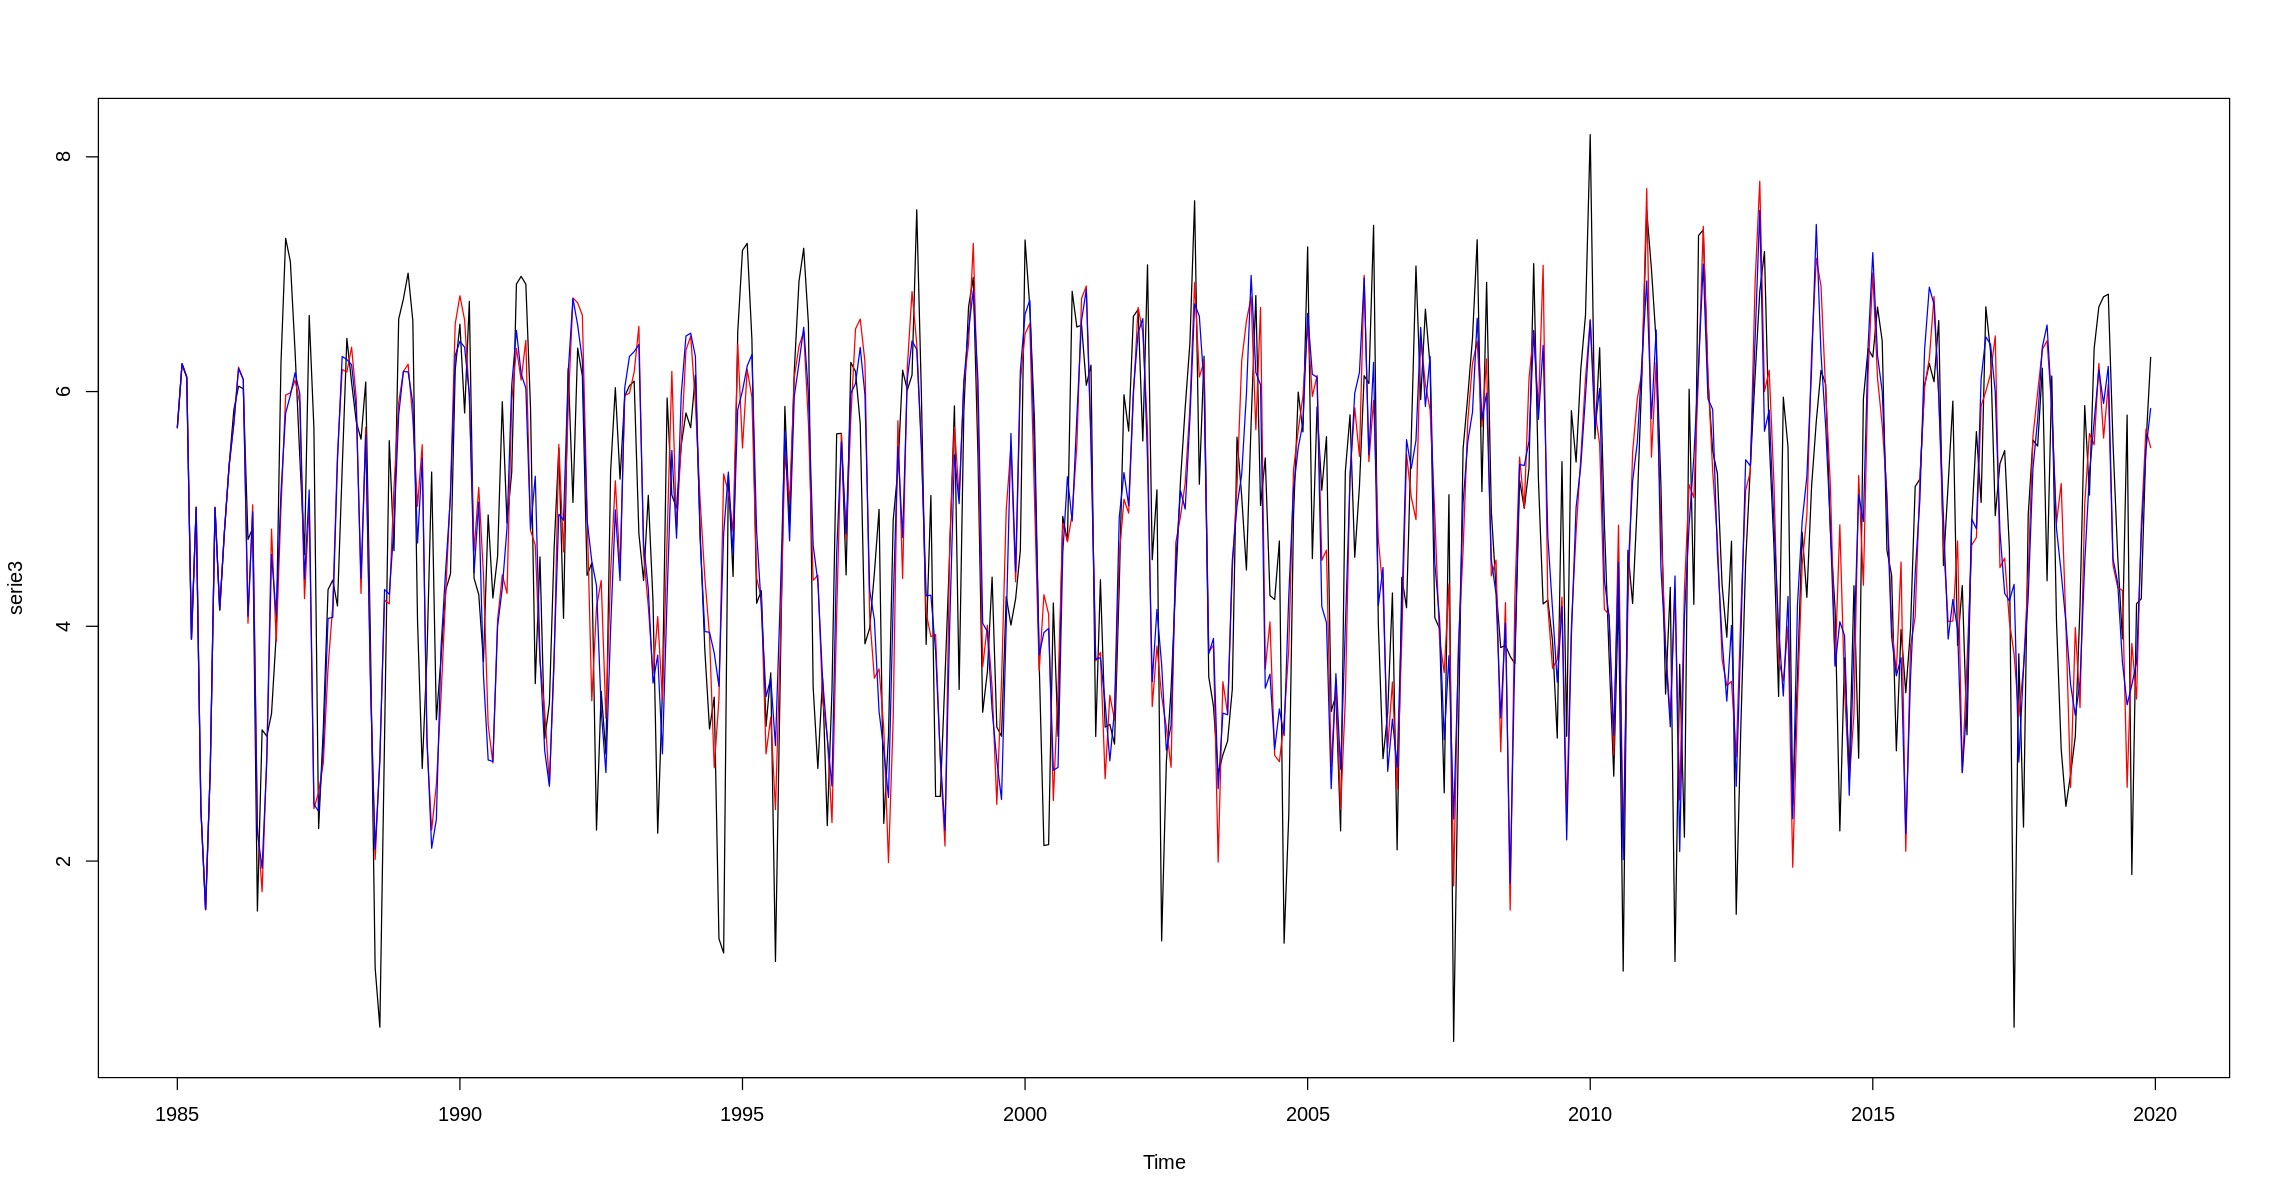

In [135]:
plot(serie3)
lines(serie3-modelo_sarima$resid, col='red')
lines(serie3-modelo_sarima2$resid, col='blue')

####6-CRIAÇÃO DAS PREVISÕES

In [136]:
#CRIAÇÃO DAS PREVISÕES DOS MODELOS PARAR OS ANOS DE 2020,2021 E 2022
#H=36

####6.1-PREVISÃO - MODELO 1

In [137]:
#fazendo a previsão da serie
previsao <-
  forecast(modelo_sarima,h=36)

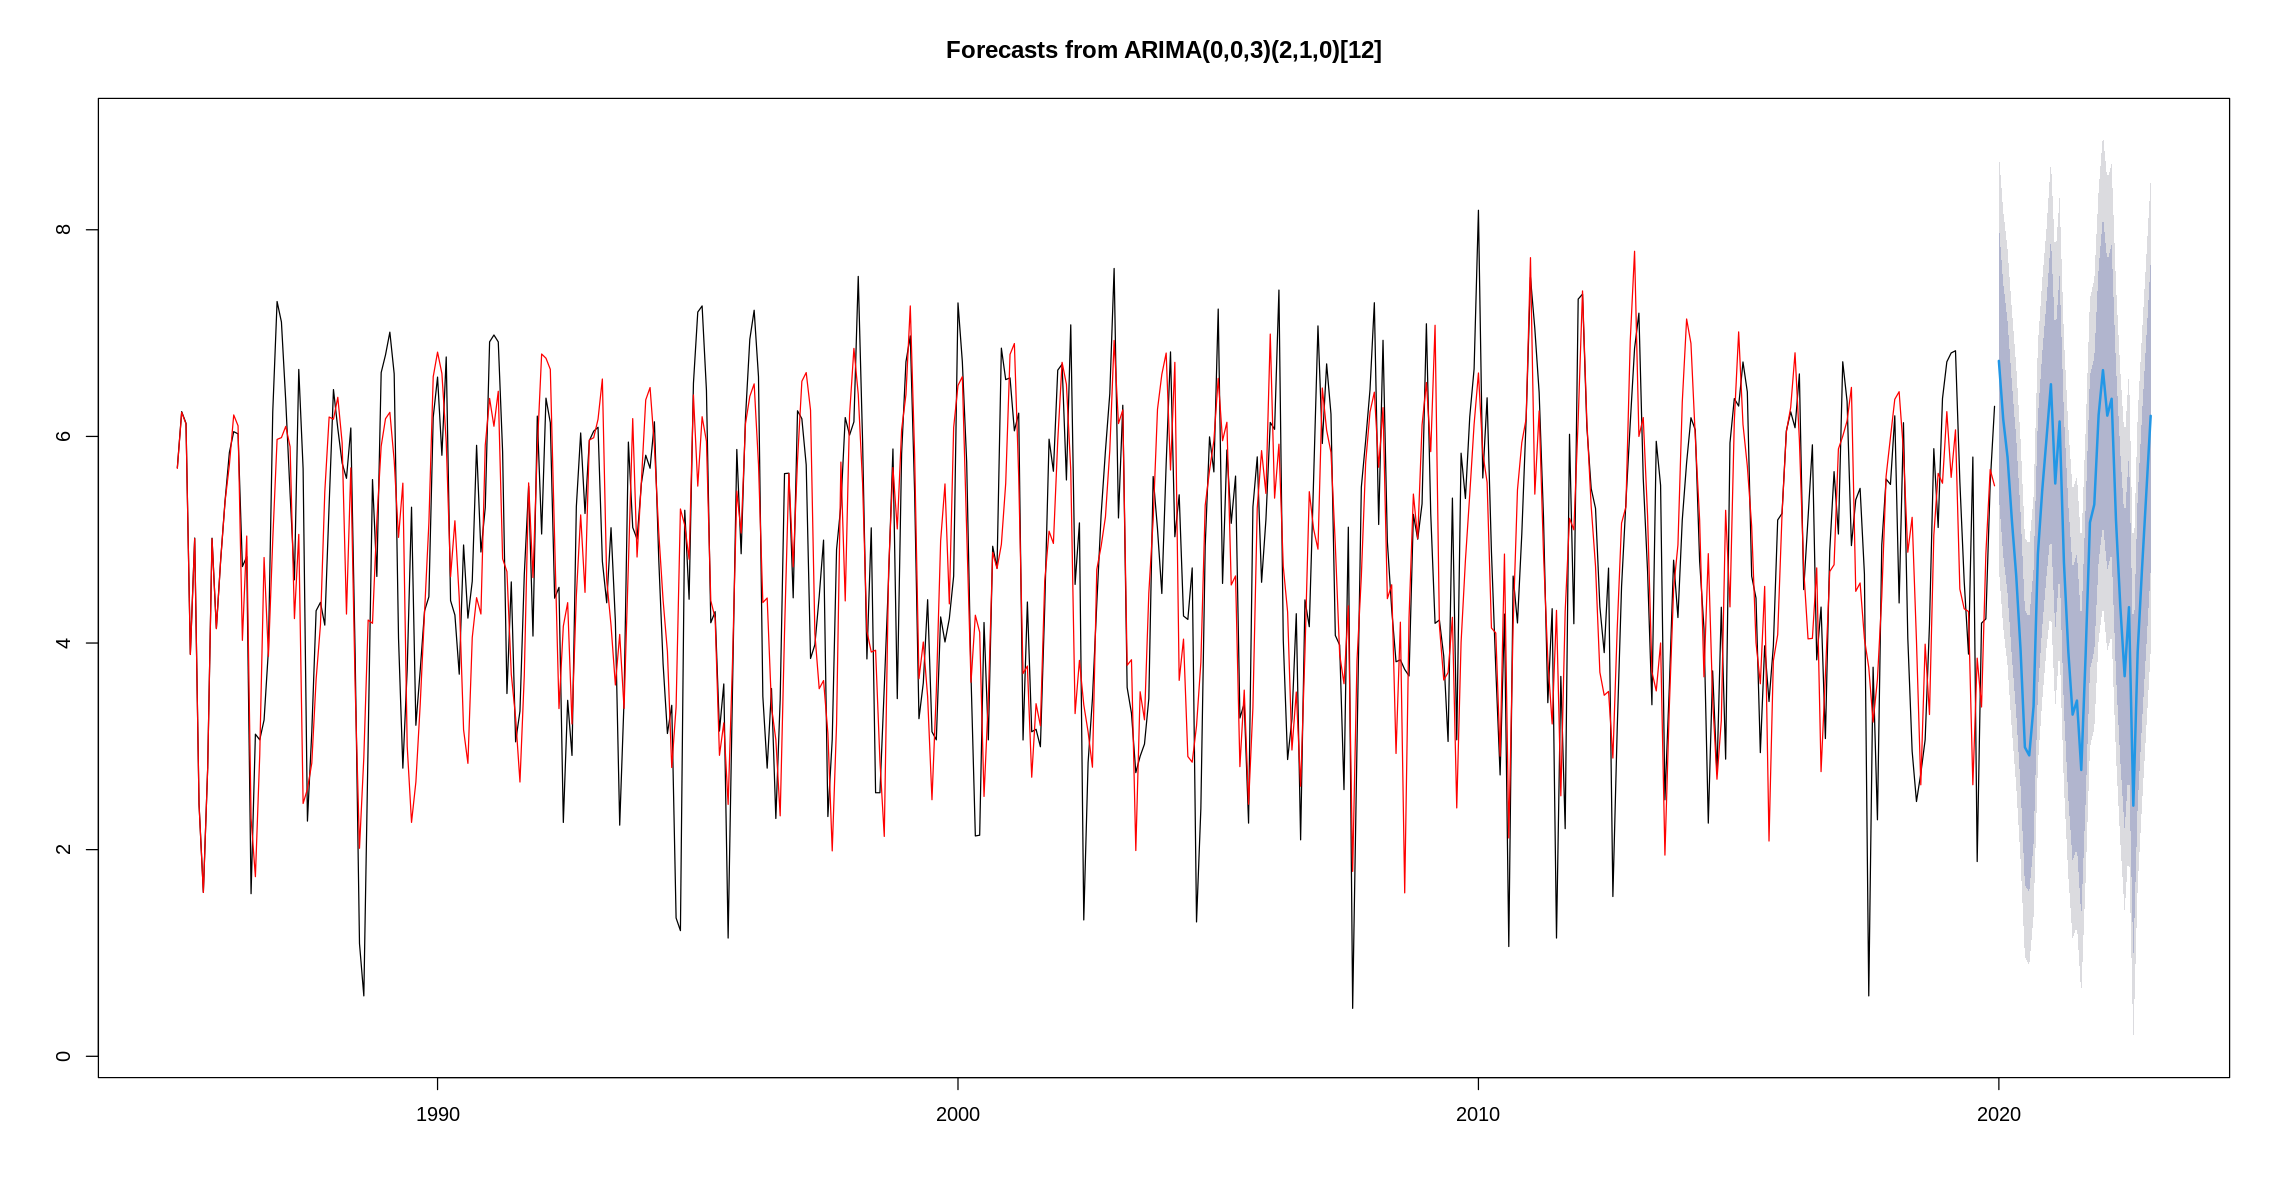

In [138]:
plot(previsao)
lines(serie3-modelo_sarima$resid, col= "red")

In [139]:
#CRIAÇÃO DA PREVISÃO
prev_escala <-
  as.data.frame(previsao)^3
View(prev_escala)

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Jan 2020,304.91814,158.7792510,520.96704,105.05336566,668.3001
Feb 2020,234.47373,114.0229489,419.12341,71.56724831,547.5393
Mar 2020,194.95547,89.9566002,360.36846,54.14323087,477.0743
Apr 2020,139.61785,57.4962328,276.64441,31.45180894,376.2047
May 2020,100.56753,36.6679908,213.68431,17.96736081,298.2852
Jun 2020,60.92429,17.7130377,145.78041,6.89883611,212.3557
Jul 2020,26.75299,4.5966123,80.56288,0.88370387,126.6588
Aug 2020,24.71286,3.9792510,76.27400,0.68515614,120.8451
Sep 2020,38.85837,8.7287498,104.83553,2.49279958,159.0701


In [140]:
#PREVISÃO 2021-2022
prev_escala1 <-
  prev_escala[ , 1]
print(prev_escala1)

 [1] 304.91814 234.47373 194.95547 139.61785 100.56753  60.92429  26.75299
 [8]  24.71286  38.85837 115.03372 164.48099 214.64027 275.22704 170.42909
[15] 231.99491 109.40678  60.48059  36.17437  40.82127  21.29049  58.44687
[22] 137.95807 152.34339 239.20339 292.94010 238.43543 257.78467 140.04727
[29]  82.53787  49.80506  82.13299  14.27732  59.95863 104.69742 162.40059
[36] 238.21066


In [141]:
#DADOS REAIS
chuva_mensal

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1985,"184,9","242,9",230,59.00,126.20,"14,6",4.00,"21,8","126,1","71,1","111,3","155,2"
1986,"199,6",221,"218,7",106.50,113.10,"3,9",30.30,---,"34,5","60,7","242,5","389,9"
1987,"525,8",---,"161,3",98.10,293.80,"183,9",11.80,"30,9","80,2","84,8","72,7","152,1"
1988,"268,7","224,4","189,2",175.10,224.90,"58,6",1.30,"0,2","28,4","173,9","100,2","289,8"
1989,"312,9","344,3","288,2",66.30,21.70,"52,5",150.10,"32,9","52,1","80,1",88,"236,7"
1990,"284,1","196,9","310,1",85.80,77.90,"50,6",121.20,"76,3","97,2","206,8","116,3","149,8"
1991,"330,7","340,3","522,4",200.30,43.30,"96,8",28.20,"37,3","101,4",168,"67,3","237,9"
1992,"129,2","258,5",---,87.20,93.50,"11,6",40.90,"24,7","150,6","219,6",---,"211,7"
1993,"221,5","225,7",110,84.60,133.90,"74,7",11.20,"40,8","210,1","134,1","125,5","170,5"


In [142]:
#DADOS REAIS DOS ANOS DE 2021,22 E 23
#TRANSFORMANDO A SERIE REAL
dados_reais<-
chuva_mensal %>%
  filter(Ano=='2023'|Ano=='2022'|Ano=='2021') %>%
   mutate(across(where(is.character),~ as.numeric(gsub(",",".",.)))) %>%
     mutate(across(
where(is.numeric),
~ifelse(is.na(.),mean(.,na.rm = TRUE),.)
))

Warning message:
“There were 5 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(where(is.character), ~as.numeric(gsub(",", ".", .)))`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4 remaining warnings.”


In [143]:
dados_reais

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021,373.3,174.1,137.8,55.7,38.5,15.5,38.0,44.8,131.3,152.80,108.20,247.4
2022,418.4,136.3,233.6,40.4,67.3,45.9,8.8,35.2,131.3,117.30,197.70,200.4
2023,377.6,452.0,138.2,165.7,43.3,85.2,15.0,40.0,131.3,135.05,152.95,223.9


In [144]:
serie_real<-
  as.vector(t(dados_reais))
print(serie_real)

 [1] 2021.00  373.30  174.10  137.80   55.70   38.50   15.50   38.00   44.80
[10]  131.30  152.80  108.20  247.40 2022.00  418.40  136.30  233.60   40.40
[19]   67.30   45.90    8.80   35.20  131.30  117.30  197.70  200.40 2023.00
[28]  377.60  452.00  138.20  165.70   43.30   85.20   15.00   40.00  131.30
[37]  135.05  152.95  223.90


In [145]:
# Raiz do erro quadrático médio DO MODELO 1
rmse1 <-
  sqrt(mean((prev_escala1 - serie_real) ** 2))
print(rmse1)

Warning message in prev_escala1 - serie_real:
“longer object length is not a multiple of shorter object length”


[1] 504.0839


####6.2-PREVISÃO - MODELO 2

In [146]:
#fazendo a previsão da serie
previsao2 <-
  forecast(modelo_sarima2,h=36)

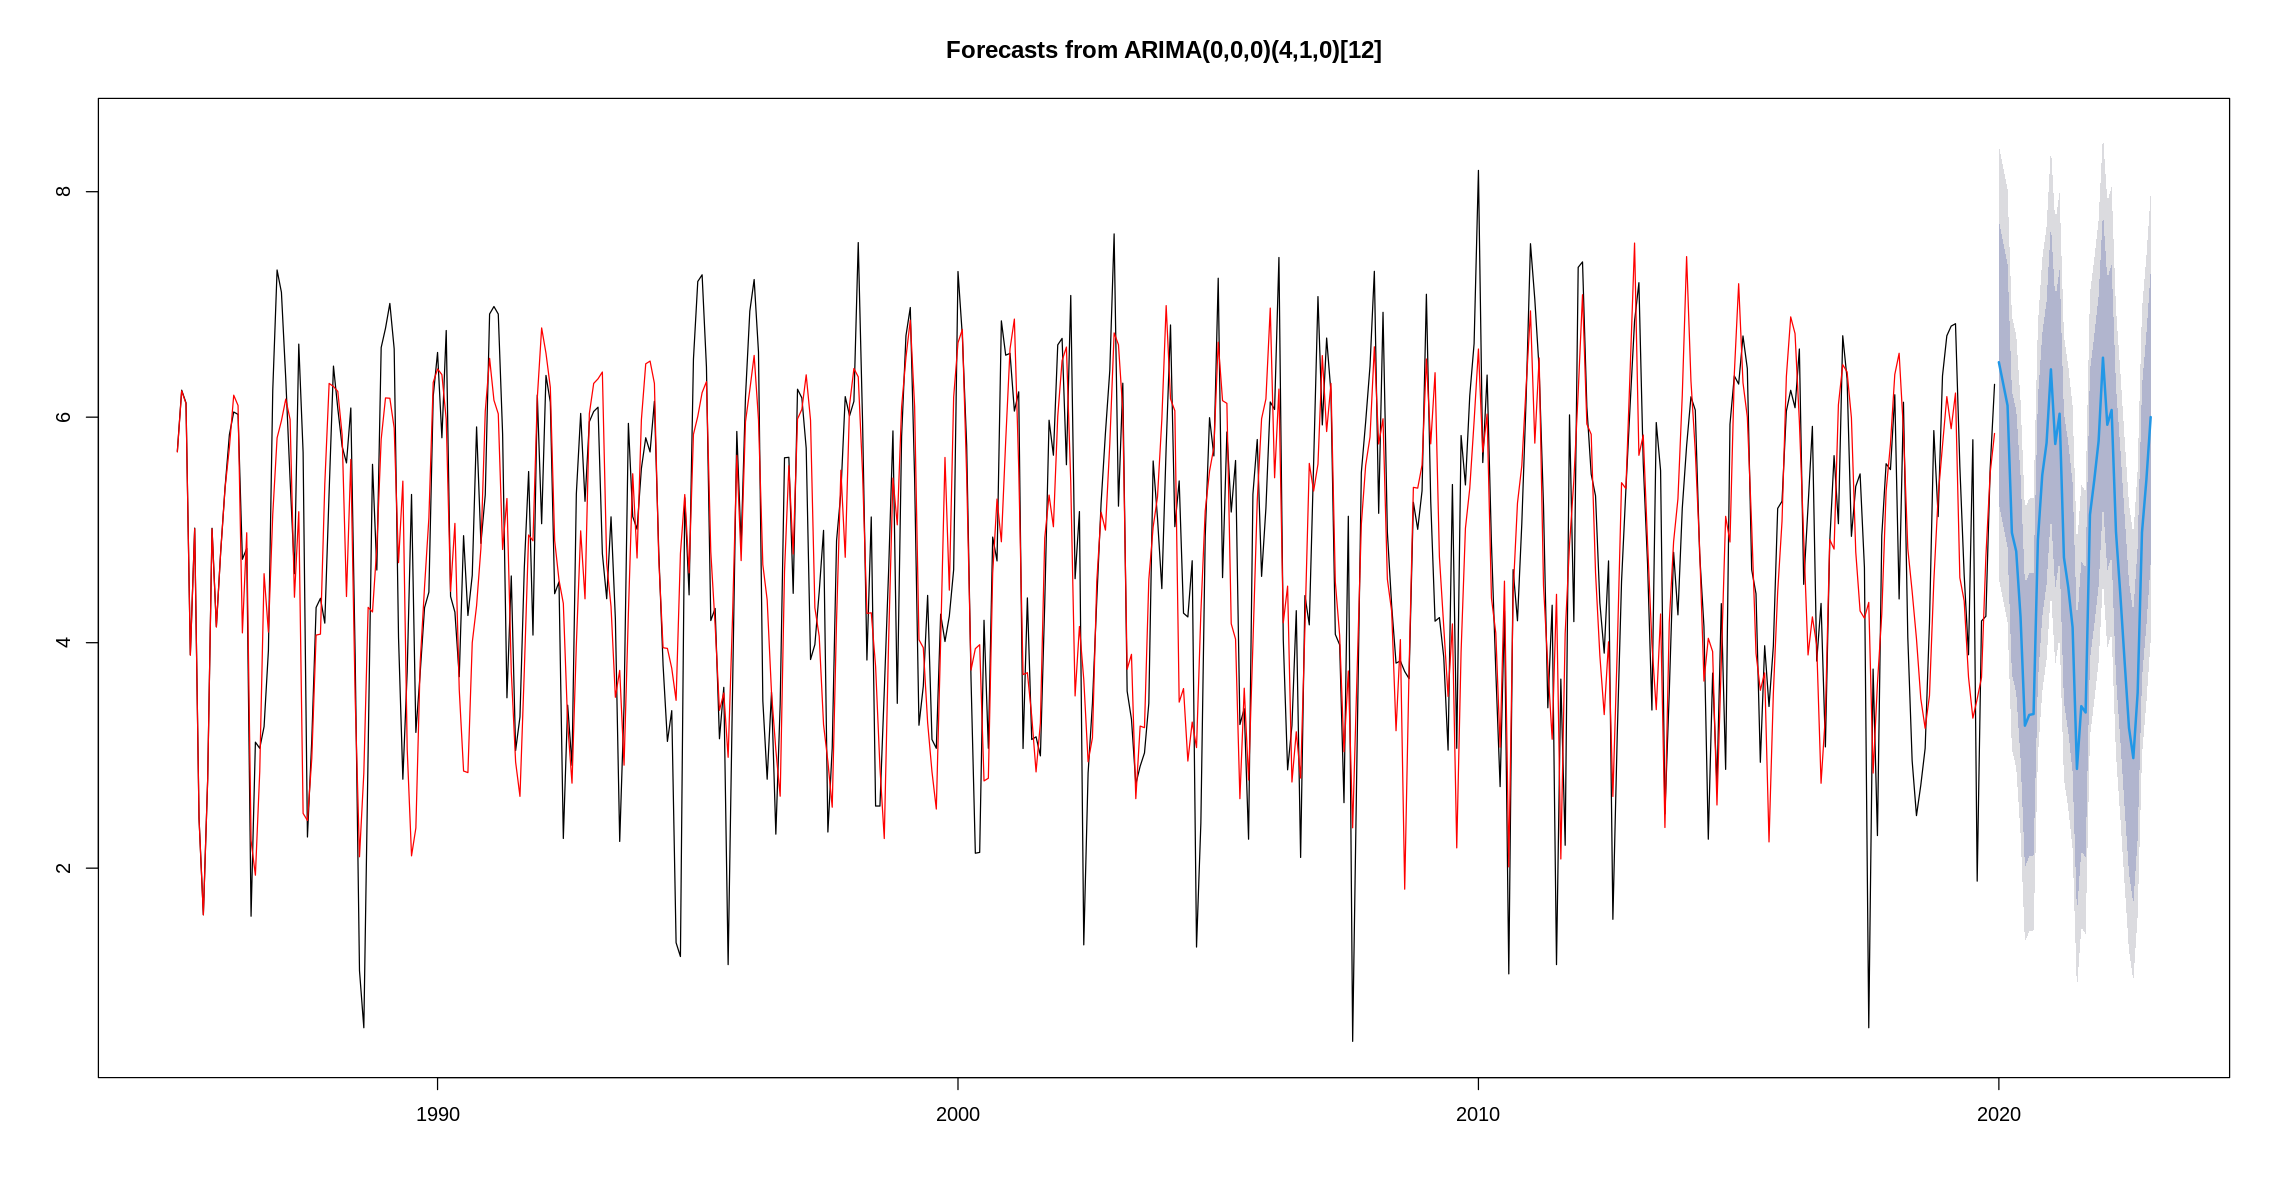

In [147]:
plot(previsao2)
lines(serie3-modelo_sarima2$resid, col= "red")

In [148]:
#CRIAÇÃO DA PREVISÃO
prev_escala2 <-
  as.data.frame(previsao2)^3
View(prev_escala2)

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Jan 2020,273.04037,143.287038,464.06768,95.3590203,594.0395
Feb 2020,249.63940,128.170363,430.57937,83.8979230,554.4814
Mar 2020,227.37612,114.005228,398.39473,73.2816395,516.3067
Apr 2020,123.16380,51.509600,241.81045,28.5562584,327.6851
May 2020,111.27830,44.937765,223.04826,24.1645933,304.6499
Jun 2020,75.42812,26.211745,164.55112,12.2679239,231.9286
Jul 2020,34.77411,8.112825,92.26390,2.4341347,139.2209
Aug 2020,37.90955,9.322655,98.22497,2.9889414,147.0421
Sep 2020,38.18281,9.430071,98.74015,3.0393478,147.7161


In [149]:
#PREVISÃO 2021-2022
prev_escala2<-
  prev_escala2[ , 1]
print(prev_escala2)

 [1] 273.04037 249.63940 227.37612 123.16380 111.27830  75.42812  34.77411
 [8]  37.90955  38.18281 118.56756 165.09398 192.32807 265.12463 191.36067
[15] 219.32092 107.55146  90.56375  70.70576  23.90501  40.59988  38.64485
[22] 135.27005 161.28378 194.01904 278.13831 208.83628 222.95610 123.81786
[29]  86.90363  56.14011  34.18131  26.36902  44.98773 123.42552 160.76390
[36] 216.10460


In [150]:
# Raiz do erro quadrático médio DO MODELO 1
rmse2 <-
  sqrt(mean((prev_escala2 - serie_real) ** 2))
print(rmse2)

Warning message in prev_escala2 - serie_real:
“longer object length is not a multiple of shorter object length”


[1] 507.665


In [151]:
# Desvio padrão do erro absoluto
mean(abs(prev_escala1 - serie_real))
sd(abs(prev_escala1 - serie_real))



Warning message in prev_escala1 - serie_real:
“longer object length is not a multiple of shorter object length”


[1] 206.5975

Warning message in prev_escala1 - serie_real:
“longer object length is not a multiple of shorter object length”


[1] 465.813

In [152]:
mean(abs(prev_escala2 - serie_real))
sd(abs(prev_escala2 - serie_real))

Warning message in prev_escala2 - serie_real:
“longer object length is not a multiple of shorter object length”


[1] 205.9664

Warning message in prev_escala2 - serie_real:
“longer object length is not a multiple of shorter object length”


[1] 470.0717

In [159]:
# MAPE
mape <-
   mean(abs(prev_escala1 - serie_real) / abs(serie_real)) * 100
mape

Warning message in prev_escala1 - serie_real:
“longer object length is not a multiple of shorter object length”


[1] 90.2984

In [158]:
# MAPE
mape2 <-
   mean(abs(prev_escala2 - serie_real) / abs(serie_real)) * 100
mape2

Warning message in prev_escala2 - serie_real:
“longer object length is not a multiple of shorter object length”


[1] 88.33078